In [1]:
# %load_ext autoreload
# %autoreload 2

### Authors:
- [Karan Bhagat](mailto:kb.in.triangulum@gmail.com) - Developer
- [Christine Task](mailto:christine.task@knexusresearch.com) - Project technical lead
- [Dhruv Kapur](mailto:dhruvka@umich.edu) - Contributor

## NIST Collaborative Research Cycle (CRC)
### Introductory tutorial for accessing the NIST CRC data and metric bundle.      
#### List of topics covered in this tutorial:
0. [Setup notebook.](#intro-section-0)
1. [Load deid datasets index file (index.csv).](#intro-section-1)  
<!--     1.1 [Veiw available features in the index dataframe.](#section-1.1)  
    1.2 [View description of a single feature in the index dataframe.](#section-1.2) -->
2. [Select specific deid. datasets from the index dataframe.](#intro-section-2)  
<!--     2.1 [Select based on library name.](#section-2.1)   
    2.2 [Select based on algorithm name.](#section-2.2)  
    2.3 [Select based on algorithm and library.](#section-2.3)  
    2.4 [Select based on algorithm type and privacy category.](#section-2.4)   
    2.5 [2.5 Find the count of deid datasets for each value of epsilon.](#section-2.5)    -->
3. [Working with the deidentified data csv files.](#intro-section-3)   
<!--     3.1 [Find the count of records where marital status is N/A i.e. age less than 15 years.](#section-3.1)    -->
4. [Working with the target data csv files.](#intro-section-4)  
<!--     4.1 [Access target datasets.](#section-4.1)  
    4.2 [Find the count of records in each target dataset where marital status is N/A.](#section-4.2)    -->
5. [Compare target and deid datasets.](#intro-section-5)  
<!--     5.1 [Combine counts from deid and target datasets.](#section-5.1)   
    5.2 [Plot the count of records where marital status is N/A.](#section-5.2)  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.1 [Plot ma2019 datasets.](#section-5.2.1)   
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.2 [Plot tx2019 datasets.](#section-5.2.2)   
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.3 [Plot national2019 datasets.](#section-5.2.3) -->
6. [Use index.csv to highlight plots by algorithm properties.](#intro-section-6)  
<!--     6.1 [Compute difference of marital status N/A count in deid and its target dataset.](#section-6.1)  
    6.2 [Plot comparsion between deid datasets.](#section-6.2) -->
7. [Access SDNIST evaluation reports.](#intro-section-7)  
<!--     7.1 [List available evaluation results.](#section-7.1)   
    7.2 [List evaluation results for k-marginal metric.](#section-7.2)  
    7.3 [Get k-marginal metric score.](#section-7.3)   -->
8. [Show relationship between two evaluation metrics.](#intro-section-8)  
9. [Identify specific data samples of interest.](#intro-section-9)
10. [Show images from SDNist evaluation reports.](#intro-section-10)  
<!--     9.1 [List evaluation results for pca metric.](#section-9.1)  
    9.2 [Two methods to access pca plot png files.](#section-9.2)  
    9.3 [Show pca plot for deid dataset.](#section-9.3)  
    9.4 [Show PCA plot of both deid dataset and its target dataset.](#section-9.4)    -->
11. [Get evaluation metrics for specific samples of interest.](#intro-section-11)  
<!--     10.1 [List evaluation results for inconsistencies metric.](#section-10.1)  
    10.2 [Get age-based inconsistency violations count.](#section-10.2)  
    10.3 [Show inconsistency violations for selected deid datasets.](#section-10.3)   -->

<a id="intro-section-0"></a>
## Setup notebook.

### Import required libraries

In [2]:
# import required libraries
from pathlib import Path  # for creating paths for the filesystem operations
import os  # for filesystem operations
import pandas as pd  # for tabular data operations
import numpy as np  # for tabular data operations
import matplotlib.pyplot as plt  # for plotting data as charts
import json

### Import local libraries present in libs package

In [3]:
# Import helper constants and functions
# libs.util has some small utility functions
# such has read_json, list_report etc.
import libs.util as u
# libs.plot module contains some helper
# funtions to create matplotlib charts
import libs.plot as plot
# libs.strs contains some constant strings
# represeting columns/feature names in index.csv file,
# report.json file, etc.
# Some examples of such constants: 
# LIBRARY_NAME, ALOGIRTHM_NAME, TARGET_DATASET etc.
from libs.strs import *
# lib.strs provides get_colors function that can be
# use to generate random colors.
import libs.color as color

### Change Current Working Directory (CWD) to: crc_data_and_metric_bundle

In [4]:
print('CWD Before: ', Path.cwd())
# get current working directory
cwd = Path.cwd()
# get path to the directory where is notebook is located
notebook_dir = u.notebook_path()
# Name of the parent directory of this notebook is crc_data_and_metric_bundle_1.0
new_cwd = notebook_dir.parent
# Set new current working directory path which ends in crc_data_and_metric_bundle_1.0
os.chdir(new_cwd)
print('CWD After: ', Path.cwd())

CWD Before:  /Users/karan/Documents/Knexus/NIST/SDNist/crc_acceleration_bundle_1.1/crc_data_and_metric_bundle_1.1/notebooks
CWD After:  /Users/karan/Documents/Knexus/NIST/SDNist/crc_acceleration_bundle_1.1/crc_data_and_metric_bundle_1.1


<a id="intro-section-1"></a>
## 1. Load deid datasets index file (index.csv)
index.csv file has tabular information about the deidentified (deid) datasets created using different data-deidentification libraries and algorithms. 
#### Location of index.csv: *crc_data_and_metric_bundle_1.0/index.csv*
#### Location of this notebook: *crc_data_and_metric_bundle_1.0/notebooks/intro.ipynb*

In [5]:
CWD = Path.cwd()  # get current working directory path
# Create path to the index.csv file
INDEX_FILE_PATH = Path(CWD, 'index.csv')
# read index csv into idx_df variable
# idx stands for index
idx_df = pd.read_csv(INDEX_FILE_PATH, index_col=0).reset_index(drop=True)

Index data has a total of 298 different deid. datasets and each dataset has 23 different properties.

In [6]:
# See the shape of the index dataframe.
idx_df.shape

(458, 22)

In [7]:
# See five random rows of the index dataframe
idx_df.sample(5)

,library name,algorithm name,algorithm type,target dataset,feature set name,feature space size,features list,privacy category,privacy label detail,epsilon,...,variant label detail,research papers,data path,labels path,report path,team,submission number,submission timestamp,quasi identifiers subset,deid data id
134,sdv,tvae,neural net,national2019,all-features,517839049728000000000000000,"PUMA, AGEP, SEX, MSP, HISP, RAC1P, NOC, NPF, H...",non_dp,The TVAE Synthesizer uses a variational autoen...,NaN,...,NaN,https://doi.org/10.48550/arXiv.1907.00503,deid_data/sdv_tvae/national/tvae_all.csv,deid_data/sdv_tvae/national/tvae_all.json,deid_data/sdv_tvae/national/report_tvae_all_na...,CRC,NaN,5/20/2023 00:00:00,NaN,4c4f6007fe2f861217de3463588a0e187cbcd841
207,smartnoise-synth,mst,stat model,ma2019,simple-features,5721075360000000000,"PUMA, AGEP, SEX, MSP, HISP, RAC1P, NOC, NPF, H...",dp,Differentially private synthetic data. From M...,1.0,...,NaN,https://doi.org/10.48550/arXiv.2108.04978,deid_data/smartnoise_mst/ma/mst_e_1_simple_ma2...,deid_data/smartnoise_mst/ma/mst_e_1_simple_ma2...,deid_data/smartnoise_mst/ma/report_mst_e_1_sim...,CRC,NaN,5/20/2023 00:00:00,NaN,87a56494d7e7918df594190873973842691eba27
358,synthcity,bayesian_network,stat model,national2019,industry-focused,108108000,"PUMA, SEX, MSP, HISP, RAC1P, OWN_RENT, INDP_CA...",non_dp,The method represents a set of random variable...,NaN,...,added a column target to the original dataset ...,https://doi.org/10.1016/j.trc.2015.10.010,deid_data/synthcity_bayesian_network/national/...,deid_data/synthcity_bayesian_network/national/...,deid_data/synthcity_bayesian_network/national/...,CRC,NaN,5/20/2023 00:00:00,NaN,6f2e994183a7a97a81a11906046b17efe7e1a9a7
312,smartnoise-synth,patectgan,neural net,tx2019,industry-focused,32432400,"PUMA, SEX, MSP, HISP, RAC1P, OWN_RENT, INDP_CA...",dp,Conditional tabular GAN using Private Aggregat...,1.0,...,NaN,https://openreview.net/forum?id=S1zk9iRqF7,deid_data/smartnoise_patectgan/tx/patectgan_e_...,deid_data/smartnoise_patectgan/tx/patectgan_e_...,deid_data/smartnoise_patectgan/tx/report_patec...,CRC,NaN,5/20/2023 00:00:00,NaN,462dbe0f2c6da27ca04790fa5224065d6bc5fb45
305,smartnoise-synth,patectgan,neural net,tx2019,demographic-focused-except-DEYE,113513400,"AGEP, SEX, MSP, RAC1P, HOUSING_TYPE, OWN_RENT,...",dp,Conditional tabular GAN using Private Aggregat...,5.0,...,NaN,https://openreview.net/forum?id=S1zk9iRqF7,deid_data/smartnoise_patectgan/tx/patectgan_e_...,deid_data/smartnoise_patectgan/tx/patectgan_e_...,deid_data/smartnoise_patectgan/tx/report_patec...,CRC,NaN,5/20/2023 00:00:00,NaN,b64c6dbdb24b0779b84e13d40072afcda07f162e


<a id="intro-section-1.1"></a>
### 1.1 Veiw available features in the index dataframe.
List features(columns) of each deid. dataset (each row) in the index dataframe (created from index.csv). 

Some features inform about the method of data synthesis (features such as 'library', 'algorithm name', 'epsilon', 'variant label' etc.) and others about the location of resources (such as 'data path' path to deid dataset csv file, 
'report path' path to sdnist evaluation report of the deid dataset file etc.)


In [8]:
# libs.strs contains some constant strings
# represeting columns/feature names in index.csv file,
# report.json file, etc.
# Some examples of such constants: 
# LIBRARY_NAME, ALOGIRTHM_NAME, TARGET_DATASET etc.
# We provide the full list of constants below.
# We will use these to access information in the index dataframe
column_constants = ["_".join(c.upper().split()) for c in idx_df.columns]

idx_column_names_df = pd.DataFrame(zip(idx_df.columns, column_constants), 
                                   columns=['Index Column Name', 'Python Constant'])
idx_column_names_df

,Index Column Name,Python Constant
0,library name,LIBRARY_NAME
1,algorithm name,ALGORITHM_NAME
2,algorithm type,ALGORITHM_TYPE
3,target dataset,TARGET_DATASET
4,feature set name,FEATURE_SET_NAME
5,feature space size,FEATURE_SPACE_SIZE
6,features list,FEATURES_LIST
7,privacy category,PRIVACY_CATEGORY
8,privacy label detail,PRIVACY_LABEL_DETAIL
9,epsilon,EPSILON


<a id="intro-section-1.2"></a>
### 1.2 View description of a single feature in the index dataframe.

In [9]:
# Use index_feature_description function from the libs.util module.
# index_feature_description function takes just one argument which 
# should be one of the column name available in the index file. 
# Column names are printed in the last code cell for your reference.

# Use python constant as an argument
u.index_feature_description(ALGORITHM_TYPE)

# Use index column string as an argument
# u.index_feature_description("algorithm type")


Index Column: 
-------------
algorithm type


Description:
-----------
A label indicating the general category of approach as specified below

sdc = 'Statistical Disclosure Control anonymization techniques-- Does direct perturbation, anonymization, redaction or generalization on individual records of target data'

query matching = 'Query Matching based synthetic data techniques-- Initializes a default synthetic data distribution and iteratively updates it to mimic query results on target data, using optimization or constraint satisfaction approaches'

neural net = 'Neural Network based synthetic data techniques-- Includes both GAN and Transformer Networks / Autoencoders'

stat model = 'Statistical Model based synthetic data techniques-- Uses some approach, other than a neural network, to construct a model of the feature relationships in the target data and uses this model to generate new records.'

histogram = 'Histogram based generation techniques-- Transforms the target data into a 

<a id="intro-section-2"></a>
## 2. Select specific deid. datasets from the index dataframe.

<a id="section-2.1"></a>
### 2.1 Select based on library name.
Select deid. datasets that are deidentified using sdv library (Synthetic Data Vault).

In [10]:
library = 'sdv'
# Create mask to select rows that have sdv library
# Note: this uses the python constant LIBRARY_NAME from 
# the libs.strs module see section 1.1 of this notebook.
mask = idx_df[LIBRARY_NAME] == library
# Apply mask to the index dataframe and store filtered rows into 
# filtered_idx_df: filtered index dataframe
filtered_idx_df = idx_df[mask]
# Check number of deid datasets in the filtered index dataframe
print(f'Number of deid datasets generated with {library} library: ', 
     filtered_idx_df.shape[0])

# See 10 random records from filtered index data
# UNCOMMENT FOLLOWING LINE TO SHOW DATAFRAME
# filtered_idx_df.sample(10)

Number of deid datasets generated with sdv library:  33


<a id="intro-section-2.2"></a>
### 2.2 Select based on algorithm name.
Select deid. datasets that are deidentified using tvae algorithm (triplet based variational autoencoder).

In [11]:
algorithm_name = 'tvae'
# create mask to select rows that have tvae algorithm name
mask = idx_df[ALGORITHM_NAME] == algorithm_name
# apply mask to the index dataframe and store filtered rows into 
# filtered_idx_df: filtered index dataframe
filtered_idx_df = idx_df[mask]
# check number of deid datasets in the filtered index dataframe
print(f'Number of deid datasets generated with {algorithm_name} algorithm: ', 
     filtered_idx_df.shape[0])

# See 10 random records from filtered index data
# UNCOMMENT FOLLOWING LINE TO SHOW DATAFRAME
# filtered_idx_df.sample(10)

Number of deid datasets generated with tvae algorithm:  25


<a id="intro-section-2.3"></a>
### 2.3 Select based on algorithm and library.
Select deid. datasets created using tvae algorithm and just the sdv library.

In [12]:
library_name = 'sdv'
algorithm_name = 'tvae'
# create mask to select rows that have sdv library 
# and tvae algorithm name
lib_mask = idx_df[LIBRARY_NAME] == library_name
algo_mask = idx_df[ALGORITHM_NAME] == algorithm_name
# use & operation to select rows that matches on both: library name as sdv and
# algorithm name as tvae
mask = lib_mask & algo_mask
# apply mask to the index dataframe and store filtered rows into 
# filter_idx_df: filtered index dataframe
filtered_idx_df = idx_df[mask]
# check number of deid datasets in the filtered index dataframe
print(f'Number of deid datasets generated with {library_name} library and {algorithm_name} algorithm: ', 
     filtered_idx_df.shape[0])

# See 10 random records from filtered index data
# UNCOMMENT FOLLOWING LINE TO SHOW DATAFRAME
# filtered_idx_df.sample(10)

Number of deid datasets generated with sdv library and tvae algorithm:  13


<a id="intro-section-2.4"></a>
### 2.4 Select based on algorithm type and privacy category.
Select deid. datasets that are deidentified using algorithm that is neural net based and uses differential privacy.

In [13]:
algorithm_type = 'neural net'
privacy_category = 'dp'
# create mask to select rows that have neural net algorithm type 
# and dp privacy category 
algo_type_mask = idx_df[ALGORITHM_TYPE] == algorithm_type
priv_mask = idx_df[PRIVACY_CATEGORY] == privacy_category
# use & operation to select rows that matches on both: 
# algorithm type as neural net and privacy category as dp
mask = algo_type_mask & priv_mask
# apply mask to the index dataframe and store filtered rows into 
# filterd_index_df: index dataframe that only contain deid datasets
# of algorithm type neural net and privacy category dp
filtered_idx_df = idx_df[mask]
# We rename this filtered index data frame to something 
# more specific to help us keep track of it in later steps. 
idx_neural_dp_df = filtered_idx_df
# check number of deid datasets in the filtered index dataframe
print(f'Number of deid datasets generated with {algorithm_name} \
algorithm type and uses {privacy_category} approach: ', 
     idx_neural_dp_df.shape[0])

# See 10 random records from neural net and dp filtered index
# UNCOMMENT FOLLOWING LINE TO SHOW DATAFRAME
# idx_neural_dp_df.sample(10)

Number of deid datasets generated with tvae algorithm type and uses dp approach:  68


<a id="intro-section-2.5"></a>
### 2.5 Group selected deid datasets by epsilon

In the above created filtered index dataframe (idx_neural_dp_df), check how many different deid datasets are available for each value of epsilon.

In [14]:
# see what different values of epsilon are present in the
# idx_neural_dp_df: index dataframe that only contain deid datasets
# of algorithm type neural net and privacy category dp
unq_eps_vals = idx_neural_dp_df[EPSILON].unique().tolist()
print('Unique Epsilon Values: ', unq_eps_vals)
# get counts of each unique epsilon value
eps_counts = idx_neural_dp_df[EPSILON].value_counts()

# iterate over eps_counts series object using iteritems function.
print('In the filtered index dataframe with neural net aglorithm type \
and dp approach: ')
for eps, eps_count in eps_counts.items():
    print(f'- There are {eps_count} deid. datasets with {eps} epsilon ')

Unique Epsilon Values:  [10.0, 5.0, 1.0]
In the filtered index dataframe with neural net aglorithm type and dp approach: 
- There are 25 deid. datasets with 10.0 epsilon 
- There are 25 deid. datasets with 1.0 epsilon 
- There are 18 deid. datasets with 5.0 epsilon 


<a id="intro-section-3"></a>
## 3. Working with the deidentified data csv files

In the data_and_metrics_bundle for each algorithm we have both deid data samples and metric report results.  In this section we'll show you how to navigate the deid data samples, and in the next section we'll show you how to navigate the metric results. 

To showcase how deid data csv can be used, we will find the count of rows in each deid dataset where MSP (marital status) value is 'N' (N/A: age less than 15 years). And then, compare the counts of 'N' value in MSP feature between deid datasets and the original target datasets. Next section discusses operating on target datasets.
  
Path of each deid. data csv file is given in the column 'data path' of
the index dataframe.

<a id="intro-section-3.1"></a>
### 3.1 Find the count of records where marital status is N/A i.e. age less than 15 years.
We count the number of records in each deid dataset where MSP feature (marital status) value is 'N' (N/A: age less than 15 years). We do this for all the deid datasets available in the filtered index dataframe (idx_neural_dp_df)

* Create a new column 'msp_N_count' in the filtered index data (initially filled with zeros). We will put the counts in this column.
* For each row (deid dataset) in filtered index dataframe:
    * Get path to the deid data csv file
    * Read the csv file into a pandas dataframe using data path.
    * Get the number of records where MSP value is 'N'.
    * Save this number to the msp_N_count column.

In [15]:
MSP_N_COUNT = 'msp_N_count'

# Reset index on the filtered index dataframe so that
# row id starts from 0.
idx_neural_dp_df = idx_neural_dp_df.reset_index(drop=True)

# Convert feature space size value to scientific notation for displaying
# in the chart
idx_neural_dp_df[FEATURE_SPACE_SIZE] = idx_neural_dp_df[FEATURE_SPACE_SIZE].apply(lambda x: "{:0.3e}".format(int(x)))

# Create a zero filled column 'msp_N_counts' in the 
# of filtered index data. Use np.zeros function which takes
# shape of zero filled array. In this case we want that to
# be the number of records in filtered index data (idx_neural_dp_df) 
# and can be accessed using first element of the shape property 
# in the filtered index dataframe dataframe.
idx_neural_dp_df[MSP_N_COUNT] = np.zeros(idx_neural_dp_df.shape[0]).astype(int)

# Iterate over each row (deid dataset) in filtered index dataframe.
for i, row in idx_neural_dp_df.iterrows():
    # Get path of deid. data csv file
    data_path = row[DATA_PATH]
    # Read the csv file into a pandas dataframe using data path.
    data_deid_df = pd.read_csv(data_path)

    # Cleaning step (removes extra leading column from csv).
    data_deid_df = data_deid_df.loc[:, ~data_deid_df.columns.str.startswith('Unnamed')]
    data_deid_df = data_deid_df.reset_index(drop=True)
    
    # Get the number of records where MSP (marital status) value is 'N' (N/A: age less than 15 years).
    # create a mask to only select row where MSP value is 'N'.
    mask = data_deid_df[MSP] == 'N'
    # apply mask.
    data_msp_n_df = data_deid_df[mask]
    # save the count of rows in the filtered deid data
    count = data_msp_n_df.shape[0]
    # Save value count of 'N' in MSP feature of the
    # filtered index dataframe.
    idx_neural_dp_df.loc[i, MSP_N_COUNT] = count

# See the seven random records and 
# the new column msp_N_count which we just added to the copy of 
# the filtered index dataframe
# Name of the columns to display in the selected data samples index
columns_to_show = [LIBRARY_NAME, ALGORITHM_NAME, ALGORITHM_TYPE, TARGET_DATASET,
                   PRIVACY_CATEGORY, EPSILON,EPSILON, FEATURE_SET_NAME, FEATURE_SPACE_SIZE,
                   MSP_N_COUNT, REPORT_PATH]
idx_neural_dp_df[columns_to_show].sample(7)

,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,epsilon,feature set name,feature space size,msp_N_count,report path
1,smartnoise-synth,patectgan,neural net,ma2019,dp,5.0,5.0,all-features,1.333e+25,176,deid_data/smartnoise_patectgan/ma/report_patec...
48,synthcity,pategan,neural net,ma2019,dp,1.0,1.0,family-focused,5.821e+10,211,deid_data/synthcity_pategan/ma/report_pategan_...
18,smartnoise-synth,patectgan,neural net,national2019,dp,1.0,1.0,demographic-focused,2.270e+08,3647,deid_data/smartnoise_patectgan/national/report...
33,smartnoise-synth,patectgan,neural net,tx2019,dp,10.0,10.0,family-focused,1.247e+11,182,deid_data/smartnoise_patectgan/tx/report_patec...
17,smartnoise-synth,patectgan,neural net,national2019,dp,5.0,5.0,demographic-focused,2.270e+08,399,deid_data/smartnoise_patectgan/national/report...
65,synthcity,pategan,neural net,tx2019,dp,1.0,1.0,family-focused,1.247e+11,69,deid_data/synthcity_pategan/tx/report_pategan_...
24,smartnoise-synth,patectgan,neural net,national2019,dp,5.0,5.0,industry-focused,1.081e+08,645,deid_data/smartnoise_patectgan/national/report...


Hold on to the idx_neural_dp_df dataframe as it is used in a later section where we compare count of MSP 'N' values between deid datasets (those in filtered index copy) and the target datasets.

<a id="intro-section-4"></a>
## 4. Working with the target data csv files.

<a id="intro-section-4.1"></a>
### 4.1 Access the target datasets.
Groundtruth Target datasets are available in directory 'diverse_communities_data_excerpts' which is located inside 'crc_data_and_metric_bundle'.
   
[Read more about target dataset](https://github.com/usnistgov/SDNist/tree/main/nist%20diverse%20communities%20data%20excerpts)
  
There are three different target datasets available:
* Records of people from 5 different PUMAs in Massachusetts.
    * Located at: *diverse_communities_data_excerpts/massachusetts/ma2019.csv*
* Records of people from 6 different PUMAs in Texas.
    * Located at: *diverse_communities_data_excerpts/texas/tx2019.csv*
* Records of people from 20 different PUMAs in all US.
    * Located at: *diverse_communities_data_excerpts/national/na.csv*

In [16]:
# Store path to the target dataset base directory which is 
# diverse_communities_data_excerpts.
TARGET_DATA_DIR = Path(CWD, 'diverse_communities_data_excerpts')
# Store path to all the three datasets: ma2019, tx2019, and national2019
MA_PATH = Path(TARGET_DATA_DIR, 'massachusetts', 'ma2019.csv')
TX_PATH = Path(TARGET_DATA_DIR, 'texas', 'tx2019.csv')
NAT_PATH = Path(TARGET_DATA_DIR, 'national', 'national2019.csv')

# Set name of the target datasets as constants. We use these
# later in the notebooks
MA2019 = 'ma2019'
TX2019 = 'tx2019'
NATIONAL2019 = 'national2019'

Load each of target dataset as a pandas dataframe

In [17]:
# load ma2019 csv into massachusetts dataframe 
ma_df = pd.read_csv(MA_PATH)
# load tx2019 csv into texas dataframe
tx_df = pd.read_csv(TX_PATH)
# load national2019 csv into national dataframe
nat_df = pd.read_csv(NAT_PATH)

# Display number of records (people) in each
# target dataset
print('People in MA2019 data: ', ma_df.shape[0])
print('People in TX2019 data: ', tx_df.shape[0])
print('People in NATIONAL2019 data: ', nat_df.shape[0])

People in MA2019 data:  7634
People in TX2019 data:  9276
People in NATIONAL2019 data:  27253


<a id="intro-section-4.2"></a>
### 4.2 Find the count of records in each target dataset where marital status is N/A.
This is the similar information we gathered from deid. datasets in the previous section 3 (Working with deidentified data csv files) where we found
count of records where MSP (marital status) feature value is 'N' (N/A: age less than 15 years).

* Create an empty dataframe which we use for indexing target datasets. We call this target index dataframe
* Create a new column 'target dataset' and set target dataset name for each row.
* Create a new column 'msp_N_count' and initially set it to all zeros.
* For each target data set: ma2019, tx2019 and national2019:
    * Select records where MSP feature value is 'N'.
    * Save the count of selected records in msp_N_column of target index dataframe

In [18]:
# Create an empty dataframe to index the target dataframe.
# Each row in target index dataframe will have information
# about single target dataset. So, the target index dataframe
# will have only three rows since we have only three target
# datasets namely: ma2019, tx2019 and national2019.
idx_target_df = pd.DataFrame()

# Create a column 'target dataset' in the target index dataframe
# and add name of target dataset for each of three rows.
idx_target_df[TARGET_DATASET] = [MA2019, TX2019, NATIONAL2019]
# Create another column to store count of rows with 'N' value
# for MSP feature in target datasets. For now set the count
# as zero using numpy's zeros function to create a numpy array
# of length three and filled with zeros
idx_target_df[MSP_N_COUNT] = np.zeros(3).astype(int)

# For each target dataframe count number of rows
# where MSP feature's value is 'N' and store the
# count in MSP_N_COUNT feature of target index dataframe.

# Create a list so that we can iterate over all
# three target dataframes using single for loop.
target_datasets = [ma_df, tx_df, nat_df]


# Iterate over each target dataset dataframe
for i, t_data in enumerate(target_datasets):
    # Create mask to select rows where MSP feature value is N
    mask = t_data[MSP] == 'N'
    # Apply mask and save filtered data in
    # filtered_t_data: filtered target data
    filtered_t_data = t_data[mask]
    # Find the count of records in filtered target data
    # using first element of the shape property in
    # the filtered target dataframe
    count = filtered_t_data.shape[0]
    # Set MSP_N_COUNT feature value of target dataset (at index
    # i of the dataframe) to count of rows where MSP value is N
    idx_target_df.loc[i, MSP_N_COUNT] = count

# See target index dataframe
idx_target_df

,target dataset,msp_N_count
0,ma2019,1120
1,tx2019,1682
2,national2019,4247


<a id="intro-section-5"></a>
## 5. Compare target and deid datasets (tables and bar plots).
We compare count of records where MSP (marital status) feature value is 'N' (N/A: age less than 15 years) between target and deid datasets.

<a id="intro-section-5.1"></a>
### 5.1 Combine the count of records from deid and target datasets.

We create a single dataframe by concatenating rows of deid index dataframe and target index dataframe. The new dataframe contains only three features target dataset, data source and msp_N_count. This gives us one dataframe containing the count of records where MSP feature value is 'N' for both deid and target datasets.

* Create a new column 'data source' in the filtered index dataframe and set all rows to value 'deid'.
* Create a new column 'data source' in the target index dataframe and set all rows to value 'target'.
* Get subset dataframe from the filtered index dataframe with columns: 'target dataset', 'data source' and 'msp_N_count'.
* Get subset dataframe from the index dataframe with same columns as above.
* Concatenate rows of the sub filtered index and the sub target index.

In [19]:
DATA_SOURCE = 'data source'
# Set source of data as deid or target to distinguish if dataset 
# is deindentified or original target.
# create a new column 'data source' in filtered index data and 
# set value in each row to 'deid'. 
idx_neural_dp_df[DATA_SOURCE] = DEID
# Create a new column 'data source' in target index data and
# set value in each row to 'deid'
idx_target_df[DATA_SOURCE] = TARGET

# Select only following columns from both 
# filtered index data and target index data.
# Columns: 'target dataset', 'msp_N_count', 'data source'
sub_columns = [TARGET_DATASET, DATA_SOURCE, MSP_N_COUNT]
# Select subset of columns from filtered index data copy
sub_idx_neural_dp_df = idx_neural_dp_df[sub_columns]
# Select subset of columns from target index data
sub_idx_target_df = idx_target_df[sub_columns]

# Create single dataframe by combining sub filtered index data 
# and sub target index data
msp_n_counts_df = pd.concat([sub_idx_neural_dp_df, sub_idx_target_df])\
                    .reset_index(drop=True)

# See 10 random rows of combined dataframe with counts of MSP 'N' values
msp_n_counts_df.sample(10)

,target dataset,data source,msp_N_count
8,ma2019,deid,1393
70,national2019,target,4247
39,tx2019,deid,1354
54,national2019,deid,205
69,tx2019,target,1682
1,ma2019,deid,176
64,tx2019,deid,70
62,tx2019,deid,128
41,tx2019,deid,133
4,ma2019,deid,94


<a id="intro-section-5.2"></a>
### 5.2 Plot the count of records where marital status is N/A.
We compare the count of MSP 'N' records in deid and target dataset using a bar chart. There are three target datasets and we compare each target dataset with its deid dataset in a separate bar plot.

We introduce a custom plotting library(see libs.plot module); this is a wrapper around the matplotlib plotting library which makes it easier to create plots for common analyses you might want to do on the archive. It provides bar chart and scatter plot, which we demonstrate below. Look at the code in libs.plot module for more information on using the bar and scatter functions. To make other type of plots, check out the matplotlib library itself ([matplotlib](https://matplotlib.org/stable/index.html)). 

<a id="intro-section-5.2.1"></a>
#### 5.2.1 Plot ma2019 datasets.
We plot the count of records where MSP feature value is 'N' for only ma2019 datasets (both deid and target).

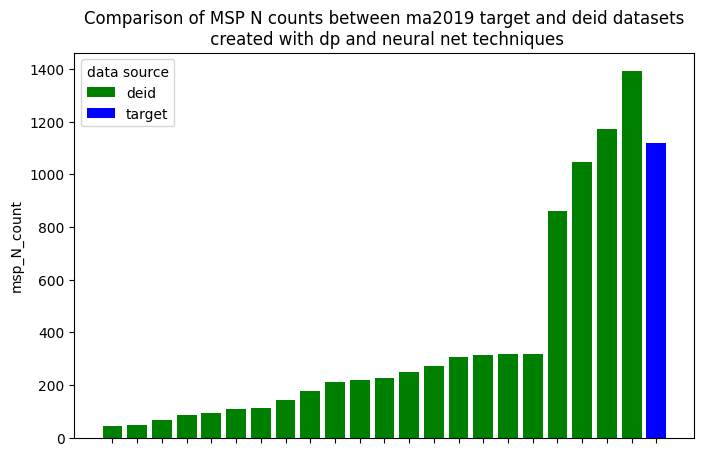

In [20]:
# select rows from msp 'N' counts data where 'target dataset' is 'ma2019'
# create a mask to select only ma2019 rows
mask = msp_n_counts_df[TARGET_DATASET] == MA2019
# apply mask to filter msp n counts dataframe
# and save result dataframe in a new variable 
# ma_msp_n_df
ma_msp_n_df = msp_n_counts_df[mask]

# Create a color dictionary to supply to the bar function.
# deid data bars should appear green color and target bar
# should be blue in color
color_map = {DEID: 'green', TARGET: 'blue'}
# Invoke bar function by giving arguments:
# tx_msp_n_df dataframe, name of column to use for bar height, 
# color by category which is data source in this case and 
# color map to indicate bar colors for each data source.
plot.bar(data=ma_msp_n_df, height_column=MSP_N_COUNT, color_by=DATA_SOURCE, color_map=color_map, 
         title="Comparison of MSP N counts between ma2019 target and deid datasets\n created with dp and neural net techniques")

<a id="intro-section-5.2.2"></a>
#### 5.2.2 Plot tx2019 datasets.
We plot the count of records where MSP feature value is 'N' for only tx2019 datasets (both deid and target).

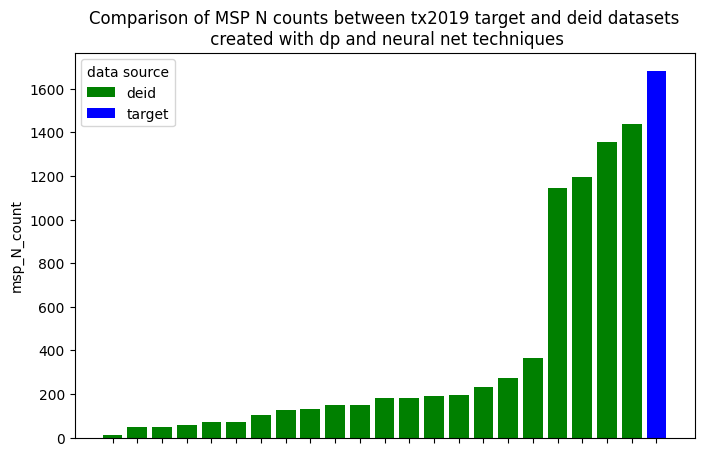

In [21]:
# select rows from msp n counts data where 'target dataset' is 'tx2019'
# create a mask to select only tx2019 rows
mask = msp_n_counts_df[TARGET_DATASET] == TX2019
# apply mask to filter msp n counts dataframe
# and save result dataframe in a new variable 
# tx_msp_n_df
tx_msp_n_df = msp_n_counts_df[mask]

# Create a color dictionary to supply to the bar function.
# deid data bars should appear green color and target bar
# should be blue in color
color_map = {DEID: 'green', TARGET: 'blue'}
# Invoke bar function by giving arguments:
# tx_msp_n_df dataframe, name of column to use for bar height, 
# color by category which is data source in this case and 
# color map to indicate bar colors for each data source.
plot.bar(data=tx_msp_n_df, height_column=MSP_N_COUNT, color_by=DATA_SOURCE, color_map=color_map,
        title="Comparison of MSP N counts between tx2019 target and deid datasets\n created with dp and neural net techniques")

<a id="intro-section-5.2.3"></a>
#### 5.2.3 Plot national2019 datasets.
We plot the count of records where MSP feature value is 'N' for only national2019 datasets (both deid and target).

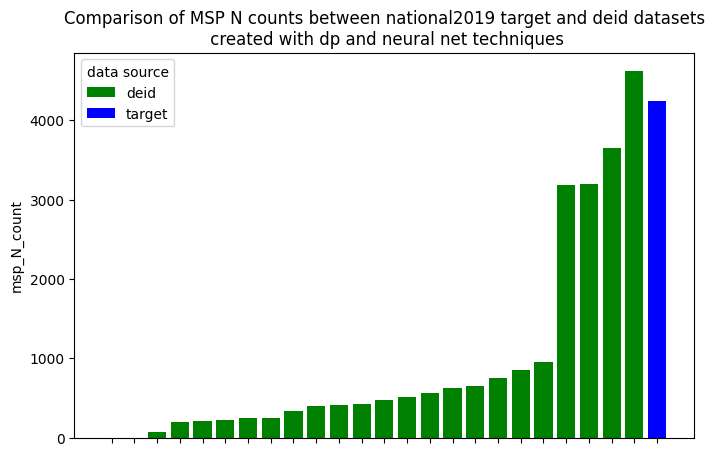

In [22]:
# select rows from msp n counts data where 'target dataset' is 'national2019'
# create a mask to select only national2019 rows
mask = msp_n_counts_df[TARGET_DATASET] == NATIONAL2019

# apply mask to filter msp n counts dataframe
# and save result dataframe in a new variable 
# nat_msp_n_df
nat_msp_n_df = msp_n_counts_df[mask]

# We won't go through the whole bar chart plotting code again
# instead we will use helper function 'bar
# available in the libs.plot module.
# 'bar' function is similar to how we plot MA datasets 
# bar chart in the section before the last.

# Create a color dictionary to supply to the bar function
# deid data bars should appear green color and target bar
# should be blue in color
color_map = {DEID: 'green', TARGET: 'blue'}
# Invoke bar function by giving arguments:
# nat_msp_n_df dataframe, name of column to use for bar height, 
# color by category which is data source in this case and 
# color map to indicate bar colors for each data source.
plot.bar(data=nat_msp_n_df, height_column=MSP_N_COUNT, color_by=DATA_SOURCE, color_map=color_map,
        title="Comparison of MSP N counts between national2019 target and deid datasets\n created with dp and neural net techniques")

<a id="intro-section-6"></a>
## 6. Use index.csv to highlight plots by algorithm properties.

The bar charts in the section above showed a lot of variation between different deid data samples (the green bars have many different heights); we'd like to understand those differences better.  

In this section we use bar charts with different colored highlighting to see the impact of properties such as epsilon, feature space size, and algorithm choice on performance. In differential privacy deid algorithms, epsilon is a parameter that controls the privacy/utility trade off. Lower values of epsilon (epsilon 1) mean a stronger privacy guarantee (and generally poorer utility). Higher values of epsilon (epsilon 10) mean a weaker privacy guarantee (and possibly better utility).  The feature space is the set of all possible values a record could have; the full 24 feature schema has a very large feature space while the demographic-focused feature set has a significantly smaller feature space. Larger feature spaces are generally more difficult for deidentification.

<a id="intro-section-6.1"></a>
### 6.1 Compute difference of marital status N/A count in deid and its target dataset.
To compare different deid datasets we first create a new score 'msp 'N' count absolute difference'. We compute the new score by taking the absolute difference of count of MSP 'N' records in deid dataset and its target dataset. Count of MSP 'N' records means the number of records where MSP feature (marital status) value is 'N' (N/A: age less than 15 years).

* Create a zero filled column 'msp_N_count_diff' in the filtered index data.
* For each row (deid dataset) in filtered index dataframe:
    * Get msp_N_count of the deid dataset in current row
    * Get name of the target dataset used to create current deid dataset.
    * Get msp_N_count of the target dataset from target index dataframe(idx_target_df).
    * Substract deid msp_N_count value from target msp_N_count value.
    * Save the difference between msp_N_count in the new 'msp_N_count_diff' column of the filtered index dataframe.

In [23]:
MSP_N_COUNT_DIFF = 'msp_N_count_diff'

# Create a zero filled column 'msp_N_counts' in the copy 
# of filtered index data. Use np.zeros function which takes
# shape of the zeros filled array. In this case we want that to
# be the number of records in filtered index data (idx_neural_dp_df) 
# and can be accessed using first element of the shape property 
# in the filtered index dataframe dataframe.
idx_neural_dp_df[MSP_N_COUNT_DIFF] = np.zeros(idx_neural_dp_df.shape[0]).astype(int)

# Iterate over each row (deid dataset) in filtered index dataframe.
for i, row in idx_neural_dp_df.iterrows():
    # Get msp_N_count of the deid dataset in current row
    deid_msp_n_count = row[MSP_N_COUNT]
    # Get name of the target dataset used to create current deid dataset.
    target_dataset = row[TARGET_DATASET]
    
    # Get msp_N_count of the target dataset from 
    # target index dataframe(idx_target_df).
    # create mask to get only target dataset used for the
    # deid dataset
    mask = idx_target_df[TARGET_DATASET] == target_dataset
    # apply mask
    filtered_idx_tar_df = idx_target_df[mask]
    # Read msp_N_count of the target dataset. We get 0th index
    # of the values in the msp_N_count column as it has only
    # one value.
    target_msp_n_count = filtered_idx_tar_df[MSP_N_COUNT].values[0]
    
    # Substract deid msp_N_count value from target msp_N_count value.
    msp_n_count_diff = abs(target_msp_n_count - deid_msp_n_count)
    
    # Save the absolute difference between msp_N_count in the 
    # new 'msp_N_count_diff' column of the filtered index dataframe.
    idx_neural_dp_df.loc[i, MSP_N_COUNT_DIFF] = msp_n_count_diff

# See the seven random records and 
# the new column MSP_N_COUNT added to the copy of 
# the filtered index dataframe
# Name of the columns to display in the selected data samples index
columns_to_show = [LIBRARY_NAME, ALGORITHM_NAME, ALGORITHM_TYPE, TARGET_DATASET,
                   PRIVACY_CATEGORY, EPSILON, FEATURE_SET_NAME, FEATURE_SPACE_SIZE, 
                   MSP_N_COUNT_DIFF, REPORT_PATH]
idx_neural_dp_df[columns_to_show].sample(7)

,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,feature set name,feature space size,msp_N_count_diff,report path
35,smartnoise-synth,patectgan,neural net,tx2019,dp,1.0,family-focused,1.247e+11,242,deid_data/smartnoise_patectgan/tx/report_patec...
61,synthcity,pategan,neural net,tx2019,dp,1.0,all-features,3.604e+25,1672,deid_data/synthcity_pategan/tx/report_pategan_...
59,synthcity,pategan,neural net,national2019,dp,1.0,industry-focused,1.081e+08,3820,deid_data/synthcity_pategan/national/report_pa...
7,smartnoise-synth,patectgan,neural net,ma2019,dp,5.0,family-focused,5.821e+10,870,deid_data/smartnoise_patectgan/ma/report_patec...
25,smartnoise-synth,patectgan,neural net,national2019,dp,10.0,industry-focused,1.081e+08,3491,deid_data/smartnoise_patectgan/national/report...
34,smartnoise-synth,patectgan,neural net,tx2019,dp,5.0,family-focused,1.247e+11,1449,deid_data/smartnoise_patectgan/tx/report_patec...
3,smartnoise-synth,patectgan,neural net,ma2019,dp,5.0,demographic-focused,2.270e+08,900,deid_data/smartnoise_patectgan/ma/report_patec...


<a id="intro-section-6.2"></a>
### 6.2 Plot comparsion between deid datasets by privacy parameter epsilon.
We show a bar chart comparing MSP 'N' absolute count difference of deid datasets. And also show relation between deid dataset's epsilon and MSP 'N' absolute count difference.

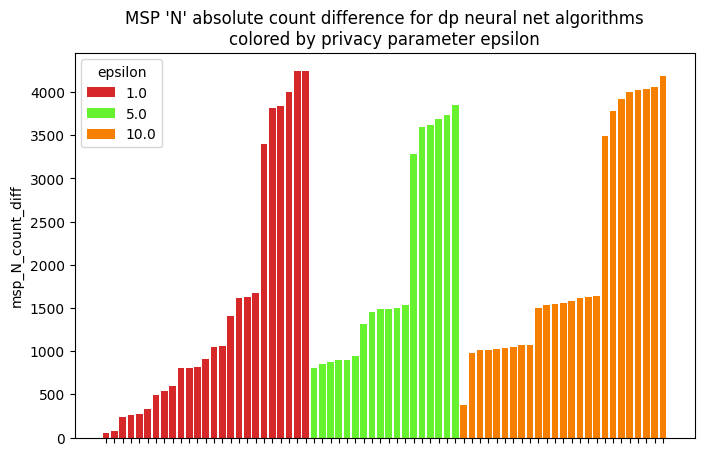

In [24]:
# Sort the idx_neural_dp_df first by EPSILON and MSP_N_COUNT_DIFF
# so that all datasets wtih same epsilon are plotted together
idx_neural_dp_df = idx_neural_dp_df.sort_values(by=[EPSILON, MSP_N_COUNT_DIFF])

# Get all unique values of epsilon availble in the filtered
# index dataframe
epsilon_values = idx_neural_dp_df[EPSILON].unique().tolist()

# Create a color dictionary to supply to the bar function
# Find count of unique epsilon values
total_epsilon_values = len(epsilon_values)
# Get a different color for each epsilon value using
# get_colors function in libs.color module.
# get_colors function takes the number of colors as
# argument and return a list of different hex color 
# values.
colors = color.get_colors(total_epsilon_values)
# Use dictionary comprehension to create a color map
# which is a mapping of epsilon value to a hex color
# string.
color_map = {eps_val: colors[i] 
             for i, eps_val in enumerate(epsilon_values)}

# Invoke bar function by giving arguments:
# idx_neural_dp_df dataframe, name of column to use for bar height, 
# color by category which is epsilon in this case and 
# color map to indicate bar colors for each epsilon value.
# And finally can also give a title
plot.bar(data=idx_neural_dp_df, height_column=MSP_N_COUNT_DIFF, 
         color_by=EPSILON, color_map=color_map, 
         title='MSP \'N\' absolute count difference for dp neural net algorithms\ncolored by privacy parameter epsilon')

<a id="intro-section-6.3"></a>
### 6.2 Plot comparsion between deid datasets by feature space size.
We show a bar chart comparing MSP 'N' absolute count difference of deid datasets. And also show relation between deid dataset's feature space size and MSP 'N' absolute count difference.

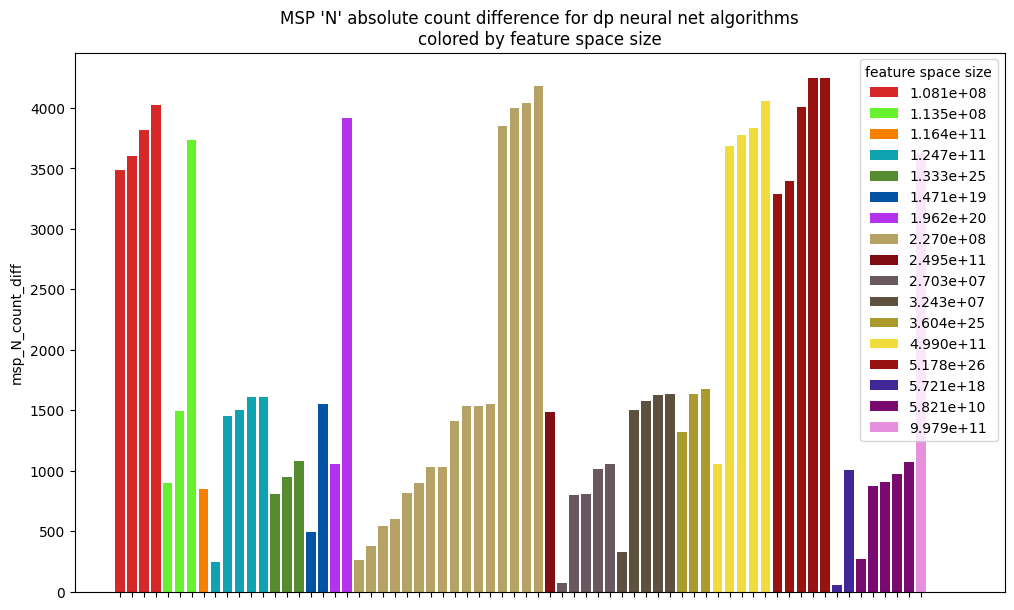

In [25]:
# Sort the idx_neural_dp_df first by EPSILON and MSP_N_COUNT_DIFF
# so that all datasets wtih same epsilon are plotted together
idx_neural_dp_df = idx_neural_dp_df.sort_values(by=[FEATURE_SPACE_SIZE, MSP_N_COUNT_DIFF])

# Get all unique values of epsilon availble in the filtered
# index dataframe
epsilon_values = idx_neural_dp_df[FEATURE_SPACE_SIZE].unique().tolist()

# Create a color dictionary to supply to the bar functio
# Find count of unique epsilon values
total_epsilon_values = len(epsilon_values)
# Get a different color for each epsilon value using
# get_colors function in libs.color module.
# get_colors function takes the number of colors as
# argument and return a list of different hex color 
# values.
colors = color.get_colors(total_epsilon_values)
# Use dictionary comprehension to create a color map
# which is a mapping of epsilon value to a hex color
# string.
color_map = {eps_val: colors[i] 
             for i, eps_val in enumerate(epsilon_values)}


# Invoke bar function by giving arguments:
# idx_neural_dp_df dataframe, name of column to use for bar height, 
# color by category which is epsilon in this case and 
# color map to indicate bar colors for each epsilon value.
# And finally can also give a title
plot.bar(data=idx_neural_dp_df, height_column=MSP_N_COUNT_DIFF, 
         color_by=FEATURE_SPACE_SIZE, color_map=color_map,
         title='MSP \'N\' absolute count difference for dp neural net algorithms\ncolored by feature space size',
         x_axis_size=75,
         figsize=(12, 7))

<a id="intro-section-6.3"></a>
### 6.2 Plot comparsion between deid datasets by algorithm name.
We show a bar chart comparing MSP 'N' absolute count difference of deid datasets. And also show relation between deid dataset's algorithm name and MSP 'N' absolute count difference.

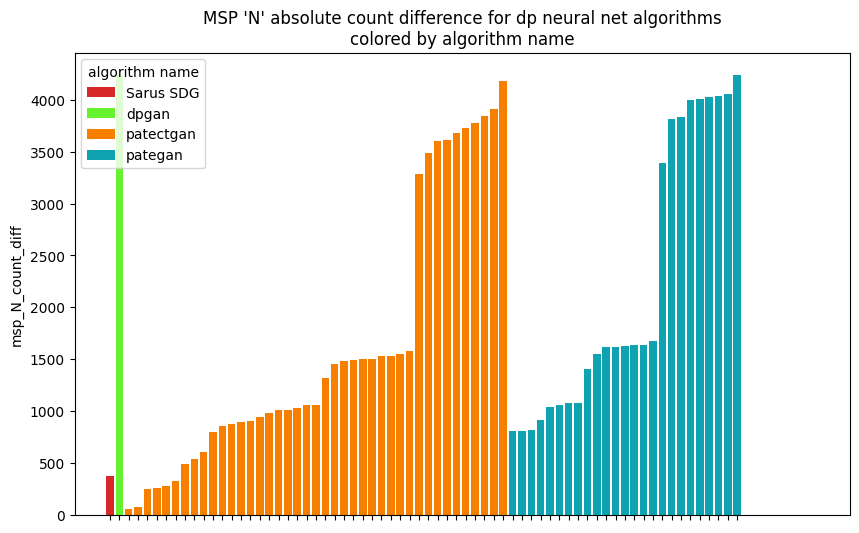

In [26]:
# Sort the nat_msp_n_diff_df first by EPSILON and MSP_N_COUNT_DIFF
# so that all datasets wtih same epsilon are plotted together
idx_neural_dp_df = idx_neural_dp_df.sort_values(by=[ALGORITHM_NAME, MSP_N_COUNT_DIFF])

# Get all unique values of epsilon availble in the filtered
# index dataframe
epsilon_values = idx_neural_dp_df[ALGORITHM_NAME].unique().tolist()

# Create a color dictionary to supply to the bar function
# Find count of unique epsilon values
total_epsilon_values = len(epsilon_values)
# Get a different color for each epsilon value using
# get_colors function in libs.color module.
# get_colors function takes the number of colors as
# argument and return a list of different hex color 
# values.
colors = color.get_colors(total_epsilon_values)
# Use dictionary comprehension to create a color map
# which is a mapping of epsilon value to a hex color
# string.
color_map = {eps_val: colors[i] 
             for i, eps_val in enumerate(epsilon_values)}

# Invoke bar function by giving arguments:
# idx_neural_dp_df dataframe, name of column to use for bar height, 
# color by category which is epsilon in this case and 
# color map to indicate bar colors for each epsilon value.
# And finally can also give a title
plot.bar(data=idx_neural_dp_df, height_column=MSP_N_COUNT_DIFF, 
         color_by=ALGORITHM_NAME, color_map=color_map,
         x_axis_size=80,
         title='MSP \'N\' absolute count difference for dp neural net algorithms\ncolored by algorithm name',
         figsize=(10, 6))

<a id="intro-section-7"></a>
## 7. Access SDNIST evaluation reports.

We demonstrate how to access the deid data evaluation reports which are created with SDNIST library. In the previous section we just looked at the difference between the target and deid data in terms of the MSP_N counts (ie, in terms of the number of children in the data, according to the MSP feature). In this section we'll look at an overall utility metric for the whole data set. The k-marginal metric was developed by Dr. Sergey Pogodin for the NIST differential privacy challenges and more can be found on it in the SDNist evaluation reports ([sample report](https://github.com/usnistgov/SDNist/tree/main/sdnist/report/sample-reports)). It is an edit distance metric that works well in large feature spaces. In this section we'll show how to retrieve the k-marginal score for every deid data sample from its evaluation report.  

Note: The highest possible score for the k-marginal metric is 1000 (this means the two data distributions match exactly-- and is not great for privacy). The worst possible score for k-marginal is 0 (this means the two data distributions do not overlap at all). Algorithms demonstrating both good utility and good privacy will generally score in the upper 800's to mid 900's.

Each deid dataset file in the **crc_data_and_metric_bundle** is evaluated with 
the [SDNIST](https://github.com/usnistgov/SDNist) deid-data evaluation library.
The SDNIST evaluation reports are kept in the same directory where the deid
dataset csv files are placed. Evaluation directory names are prepended
with the word 'report' to easily identify between evaluation results and deid data csv files.
Each evaluation report directory contains:
* a *report.html* file that can be viewed using an internet browser.
* a *report.json* file that contains results of each utility and privacy evaluation metric.
* Folders/Directories containing a metric specific evaluation data csvs and plots.

 <a id="intro-section-7.1"></a>
 ### 7.1 List all available report evaluations.
 Evaluations for different metrics are available in the report.json file of each deid dataset.   
   
 Here we list all the available SDNIST evaluation names in a report.json file.  
 The following code only shows the metric names and the name of different evaluations under each metric. We can easily access the result of any evaluation by using python dictionary key access operation since we load report.json file into a dictionary variable in this notebook.
 
   
 Uncomment following code cell to see all the available evaluation in a report.json file

In [27]:
# Uncomment u.list_report function call to 
# all the available evaluations in the report.json file.
# The leaf key in the hierarchy actually 
# contains the metric result data.
# u.list_report(idx_df) 

<a id="intro-section-7.2"></a>
### 7.2 List evaluations available for k-marginal metric.
See all the available SDNIST evaluation data for k-marginal metric in a report.json file.  

In [28]:
u.list_report(idx_df, K_MARGINAL)

 k_marginal
--- k_marginal_synopsys
------ subsample_error_comparison
------ sub_sampling_equivalent
------ k_marginal_score
------ score_in_each_puma


<a id="intro-section-7.3"></a>
### 7.3 Get scores for the k-marginal metric.
We go through the evaluation report of each deid dataset and read the k-marginal metric score from report.json files.
k-marginal utility metric score for each deid dataset was calculated as part of SDNIST evaluation process, and it can be found in the report.json file of each deid dataset.
We use deid datasets from the filtered index dataframe (**idx_neural_dp_df**) which contains 
datasets generated with **nueral net** based algorithm and **differential privacy** approach.

k-marginal score is present at 3 levels deep in the report.json file and can be accessed by 
first reading data under key 'k_marginal', then in the read
data use key 'k_marginal_synopsys' to get 2nd-level data, and at last
k-marginal score can be read by using key 'k_marginal_score' on the
2nd-level data. And this can done in one line:  
`k_marg_score = report_dict[K_MARGINAL][K_MARGINAL_SYNOPSYS][K_MARGINAL_SCORE]`

Path of SDNIST evaluation report directory is given in the column 'report path' of
the filtered index dataframe.

* Create a zero filled column 'k-marginal score' in the filtered index data.
* For each row (deid dataset) in filtered index dataframe:
    * Get path to the SDNIST evaluation report directory.
    * Create path to the report.json file in the report directory.
    * Read the json file into a python dictionary.
    * Get the k-marginal score from the report dictionary
    * Save k-marginal score in the 'k-marginal score' column of the filtered index dataframe.

In [29]:
# Create a zero filled column 'k-marginal score' in 
# filtered index dataframe (idx_neural_dp_df).
# Use np.zeros function which takes
# shape of the zero filled array, and in this case we want that to
# be the number of records in the filtered index data (idx_neural_dp_df) 
# and can be accessed using first element of the shape property 
# in the filtered index dataframe dataframe.
idx_neural_dp_df[K_MARGINAL_SCORE] = np.zeros(idx_neural_dp_df.shape[0]).astype(int)

# Iterate over each row (deid dataset) in filtered index dataframe.
for i, row in idx_neural_dp_df.iterrows():
    # Get path of the SDNIST evaluation report directory
    # for the deid dataset in current row.
    report_dir_path = row[REPORT_PATH]  # report directory path
    # Create path to the report.json file in the report directory.
    report_json_path = Path(report_dir_path, 'report.json')
    # Read the json file at report_json_path into a 
    # python dictionary variable report_dict.
    with open(report_json_path) as f:
        report_dict = json.load(f)
    # Get the k-marginal score from the report dictionary. k-marginal score
    # is present at 3 levels deep in the report dictionary and can be accessed 
    # by first reading data under key 'k_marginal', then in the read
    # data use key 'k_marginal_synopsys' to get 2nd-level data, and at last
    # k-marginal score can be read by using key 'k_marginal_score' on the
    # 2nd-level data. This all can be done in a single line of code as given
    # in the next line
    k_marg_score = report_dict[K_MARGINAL][K_MARGINAL_SYNOPSYS][K_MARGINAL_SCORE]
    
    # Save k-marginal score of the deid dataset in current row
    idx_neural_dp_df.loc[i, K_MARGINAL_SCORE] = k_marg_score

# See the seven random recrods and 
# the new column k-marginal score which we added to 
# the filtered index dataframe just now.
# Name of the columns to display in the selected data samples index
columns_to_show = [LIBRARY_NAME, ALGORITHM_NAME, ALGORITHM_TYPE, TARGET_DATASET,
                   PRIVACY_CATEGORY, EPSILON, FEATURE_SET_NAME, FEATURE_SPACE_SIZE, 
                   MSP_N_COUNT_DIFF, K_MARGINAL_SCORE, REPORT_PATH]
idx_neural_dp_df[columns_to_show].sample(7)

,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,feature set name,feature space size,msp_N_count_diff,k_marginal_score,report path
12,smartnoise-synth,patectgan,neural net,ma2019,dp,1.0,industry-focused,2.703e+07,74,410,deid_data/smartnoise_patectgan/ma/report_patec...
14,smartnoise-synth,patectgan,neural net,ma2019,dp,10.0,simple-features,5.721e+18,1009,773,deid_data/smartnoise_patectgan/ma/report_patec...
66,synthcity,pategan,neural net,tx2019,dp,10.0,industry-focused,3.243e+07,1633,366,deid_data/synthcity_pategan/tx/report_pategan_...
24,smartnoise-synth,patectgan,neural net,national2019,dp,5.0,industry-focused,1.081e+08,3602,655,deid_data/smartnoise_patectgan/national/report...
31,smartnoise-synth,patectgan,neural net,tx2019,dp,10.0,demographic-focused,2.270e+08,1533,848,deid_data/smartnoise_patectgan/tx/report_patec...
51,synthcity,pategan,neural net,national2019,dp,1.0,all-features,5.178e+26,4247,476,deid_data/synthcity_pategan_CCAIM/national/rep...
2,smartnoise-synth,patectgan,neural net,ma2019,dp,1.0,demographic-focused,2.270e+08,260,396,deid_data/smartnoise_patectgan/ma/report_patec...


<a id="intro-section-8"></a>
## 8. Show relationship between two evaluation metrics.

To demonstrate this we draw a scatter plot with x axis as k-marginal score and y axis as MSP 'N' absolute count difference. And, label each scatter point with the algorithm name that was used to create the deid dataset.

<a id="intro-section-8.1"></a>
### 8.1 Relation between k-marginal score and MSP 'N' absolute count difference colored by privacy parameter epsilon

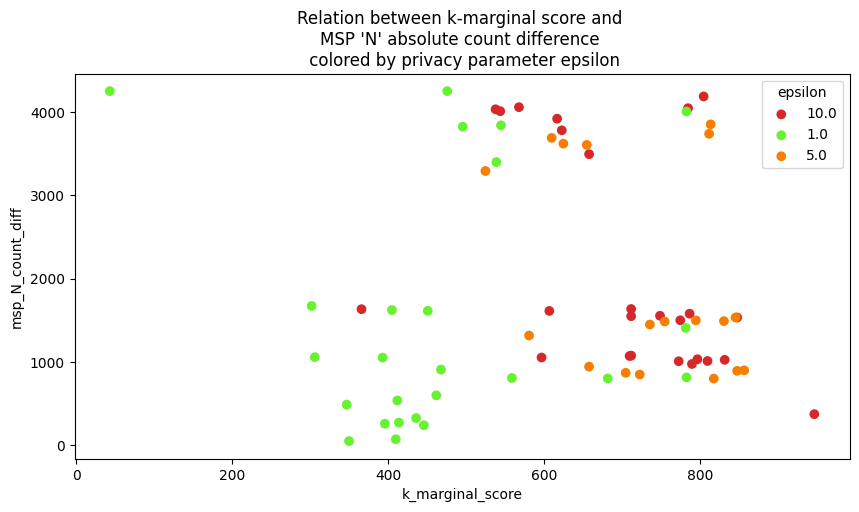

In [30]:
# Plot a scatter chart of MSP 'N' absolute count difference 
# and k-marginal score.

# Get all unique values of epsilon values availble 
# in the filtered index dataframe
unique_epsilons = idx_neural_dp_df[EPSILON].unique().tolist()


# Find count of unique epsilon values
total_epsilons = len(unique_epsilons)
# Get a different color for each epsilon value 
# using get_colors function in libs.color module.
# get_colors function takes the number of colors as an
# argument and returns a list of different hex color 
# values.
colors = color.get_colors(total_epsilons)

# create a map of epsilon to a unique color
color_map = dict(zip(unique_epsilons, colors))

# Use scatter function from libs.plot module to show
# relation between MSP 'N' absolute count different and k-marginal score
# using a scatter plot.
plot.scatter(data=idx_neural_dp_df, x=K_MARGINAL_SCORE, y=MSP_N_COUNT_DIFF, 
             color_by=EPSILON, color_map=color_map, 
             title="Relation between k-marginal score and \nMSP \'N\' absolute count difference \n colored by privacy parameter epsilon")

<a id="intro-section-8.2"></a>
### 8.2 Relation between k-marginal score and MSP 'N' absolute count difference colored by feature space size

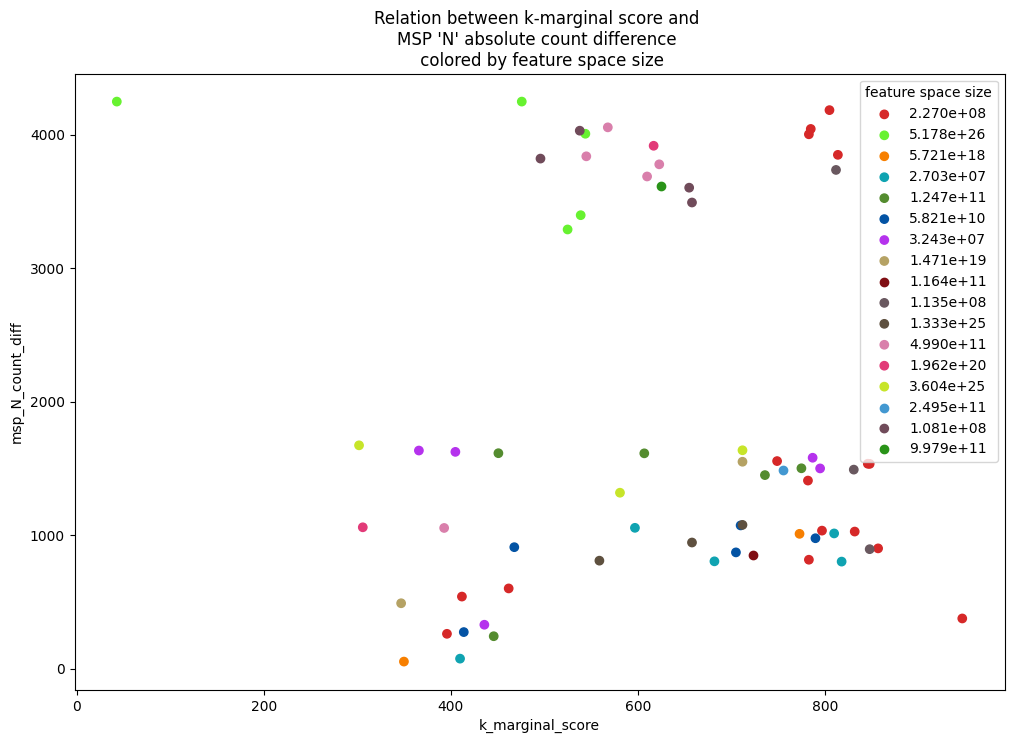

In [31]:
# Plot a scatter chart of MSP 'N' absolute count difference 
# and k-marginal score.

# Get all unique values of feature space size availble 
# in the filtered index dataframe
unique_feature_space = idx_neural_dp_df[FEATURE_SPACE_SIZE].unique().tolist()


# Find count of unique feature space sizes
total_feature_space = len(unique_feature_space)
# Get a different color for each feature space size 
# using get_colors function in libs.color module.
# get_colors function takes the number of colors as an
# argument and returns a list of different hex color 
# values.
colors = color.get_colors(total_feature_space)

# create a map of feature space size to a unique color
color_map = dict(zip(unique_feature_space, colors))

# Use scatter function from libs.plot module to show
# relation between MSP 'N' absolute count different and k-marginal score
# using a scatter plot.
plot.scatter(data=idx_neural_dp_df, x=K_MARGINAL_SCORE, y=MSP_N_COUNT_DIFF, 
             color_by=FEATURE_SPACE_SIZE, color_map=color_map, 
             title="Relation between k-marginal score and \nMSP \'N\' absolute count difference \n colored by feature space size",
             figsize=(12, 8))

<a id="intro-section-8.3"></a>
### 8.3 Relation between k-marginal score and MSP 'N' absolute count difference colored by algorithm name

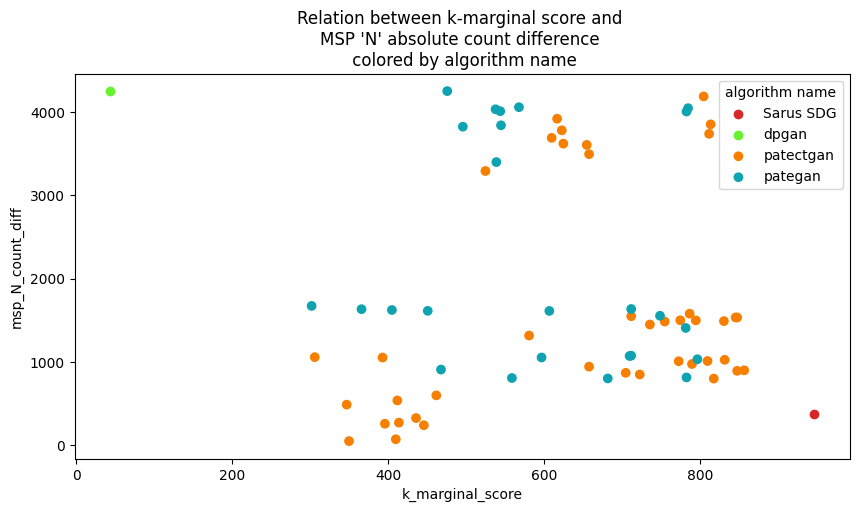

In [32]:
# Plot a scatter chart of MSP 'N' absolute count difference 
# and k-marginal score.

# Get all unique values of algorithm names availble 
# in the filtered index dataframe
unique_algorithm_names= idx_neural_dp_df[ALGORITHM_NAME].unique().tolist()


# Find count of unique algorithm names
total_algorithm_names= len(unique_algorithm_names)
# Get a different color for each algorihtm name 
# using get_colors function in libs.color module.
# get_colors function takes the number of colors as an
# argument and returns a list of different hex color 
# values.
colors = color.get_colors(total_algorithm_names)

# create a map of algorithm name to a unique color
color_map = dict(zip(unique_algorithm_names, colors))

# Use scatter function from libs.plot module to show
# relation between MSP 'N' absolute count different and k-marginal score
# using a scatter plot.
plot.scatter(data=idx_neural_dp_df, x=K_MARGINAL_SCORE, y=MSP_N_COUNT_DIFF, 
             color_by=ALGORITHM_NAME, color_map=color_map, 
             title="Relation between k-marginal score and \nMSP \'N\' absolute count difference \n colored by algorithm name")

<a id="intro-section-9"></a>
## 9. Identify specific data samples of interest.

In the previous scatterplots we saw a better (higher) k-marginal score sometimes aligned with a better (smaller) MSP_N difference, but not always.  To understand better the range of behaviors we're seeing, we might find a few outlier points to explore further.  In this section we'll briefly demonstrate how you can use a queries on the index data frame to locate a specific deidentified data sample, and in the next section we'll show how you can find more detailed information about them in the metrics report.

We'll look at four samples:
* DPGAN, which scored very poorly on both k-marginal and MSP_N count difference
* Sarus, which scored very well both
* And two PATECTGAN examples-- one which scored very well on MSP_N count difference but very poorly on k-marginal, and one which scored worse on MSP_N count but very well on k-marginal.

By finding these four examples in the index dataframe we'll learn what feature set they were run on, what values of epsilon they used and other important metadata.  We'll also learn the path to their report data which we'll use in the next section.

<a id="intro-section-9.1"></a>
### 9.1 Select deid data samples created with Sarus SDG algorithm.

In [33]:
# Create mask to select the records created with algorithm name
# Sarus SDG
mask = idx_neural_dp_df[ALGORITHM_NAME] == 'Sarus SDG'

# Apply mask to select specific records from the 
# filtered index dataframe
idx_sarus_df = idx_neural_dp_df[mask]

# Show the selected records
print('\nData Sample created with Sarus SDG algorithm\n')
idx_sarus_df[columns_to_show]


Data Sample created with Sarus SDG algorithm



,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,feature set name,feature space size,msp_N_count_diff,k_marginal_score,report path
0,Sarus SDG,Sarus SDG,neural net,national2019,dp,10.0,demographic-focused,2.270e+08,375,947,deid_data/sarus_sdg_Sarus/national/report_saru...


<a id="intro-section-9.2"></a>
### 9.2 Select deid data samples created with dpgan algorithm.

In [34]:
# Create mask to select the records created with algorithm name
# dpgan
mask = idx_neural_dp_df[ALGORITHM_NAME] == 'dpgan'

# Apply mask to select specific records from the 
# filtered index dataframe
idx_dpgan_df = idx_neural_dp_df[mask]

# Show the selected records
print('\nData Sample created with dpgan algorithm\n')
idx_dpgan_df[columns_to_show]


Data Sample created with dpgan algorithm



,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,feature set name,feature space size,msp_N_count_diff,k_marginal_score,report path
42,synthcity,dpgan,neural net,national2019,dp,1.0,all-features,5.178e+26,4247,43,deid_data/synthcity_dpgan_CCAIM/national/repor...


<a id="intro-section-9.3"></a>
### 9.3 Select deid data samples created with patectgan algorithm.

<a id="intro-section-9.3.1"></a>
#### 9.3.1 Select a patectgan data sample with maximum k-marginal scores.

In [35]:
# Create mask to select the records created with algorithm name
# patectgan
mask = idx_neural_dp_df[ALGORITHM_NAME] == 'patectgan'

# Apply mask to select specific records from the 
# filtered index dataframe
idx_patectgan_df = idx_neural_dp_df[mask]


# Select patectgan deid datasets that have maximum
# k-marginal score
mask = idx_patectgan_df[K_MARGINAL_SCORE] == max(idx_patectgan_df[K_MARGINAL_SCORE])
idx_patectgan_df = idx_patectgan_df[mask]

# Since idx_patectgan_df has two records with same 
# maximum k-marginal score, out of these two we
# select the one with worst MSP 'N" absolute count difference.

# Now out of the selected records with maximum k-marginal score,
# select the record with maximum MSP 'N' absolute count difference
mask = idx_patectgan_df[MSP_N_COUNT_DIFF] == max(idx_patectgan_df[MSP_N_COUNT_DIFF])
idx_patectgan_max_kmarg_df = idx_patectgan_df[mask]

# Show the selected records
print('\nData Sample created with patectgan algorithm and has maximum k-marginal score\n')
idx_patectgan_max_kmarg_df[columns_to_show]


Data Sample created with patectgan algorithm and has maximum k-marginal score



,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,feature set name,feature space size,msp_N_count_diff,k_marginal_score,report path
3,smartnoise-synth,patectgan,neural net,ma2019,dp,5.0,demographic-focused,2.270e+08,900,857,deid_data/smartnoise_patectgan/ma/report_patec...


<a id="intro-section-9.3.2"></a>
#### 9.3.2 Select a patectgan data sample with minimum MSP 'N' absolute count difference

In [36]:
# Create mask to select the records created with algorithm name
# patectgan
mask = idx_neural_dp_df[ALGORITHM_NAME] == 'patectgan'

# Apply mask to select specific records from the 
# filtered index dataframe
idx_patectgan_df = idx_neural_dp_df[mask]


# Select patectgan deid datasets that have minimum
# MSP 'N' absolute count difference
mask = idx_patectgan_df[MSP_N_COUNT_DIFF] == min(idx_patectgan_df[MSP_N_COUNT_DIFF])
idx_patectgan_min_mspdiff_df = idx_patectgan_df[mask]

# Show the selected records
print('\nData Sample created with patectgan algorithm and has minimum MSP \'N\' absolute count difference\n')
idx_patectgan_min_mspdiff_df[columns_to_show]


Data Sample created with patectgan algorithm and has minimum MSP 'N' absolute count difference



,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,feature set name,feature space size,msp_N_count_diff,k_marginal_score,report path
13,smartnoise-synth,patectgan,neural net,ma2019,dp,1.0,simple-features,5.721e+18,52,350,deid_data/smartnoise_patectgan/ma/report_patec...


<a id="intro-section-9.3"></a>
### 9.4 Access deid data ID of the four data samples we created above.
ID of each deid data sample is given under column 'deid data id'. 

In [37]:
# Show deid data id of 5 data samples
idx_neural_dp_df[[LIBRARY_NAME, ALGORITHM_NAME, DEID_DATA_ID]].sample(5)

,library name,algorithm name,deid data id
57,synthcity,pategan,7e18c4f0f6f0ef3fa26cdb5fb79edae06724f30f
43,synthcity,pategan,1717fd4a1c6308ccb68ce12407497bca9d28d69f
41,smartnoise-synth,patectgan,a22fd858c15643efff27cf6a0f984a75a16adadb
17,smartnoise-synth,patectgan,2ae1b5e9b639d44c926d0a16cb3fe079b92339e8
61,synthcity,pategan,de5f8de88202e7a475c4c2d305573b5925f7938b


In [38]:
# Get deid data id for data sample created with Sarus SDG algorithm
sarus_id = idx_sarus_df[DEID_DATA_ID].values[0]
print(f'Sarus SDG data sample ID:\n {sarus_id}')

print()
# Get deid data id for data sample created with dpgan algorithm
dpgan_id = idx_dpgan_df[DEID_DATA_ID].values[0]
print(f'dpgan data sample ID:\n {dpgan_id}')

print()
# Get deid data id for data sample created with patectgan algorithm and
# has maximum k-marginal score
patectgan_max_kmarg_id = idx_patectgan_max_kmarg_df[DEID_DATA_ID].values[0]
print(f'patectgan max k-marginal data sample ID:\n {patectgan_max_kmarg_id}')

print()
# Get deid data id for data sample created with patectgan algorithm and
# has minimum MSP 'N' absolute count diff
patectgan_min_mspdiff_id = idx_patectgan_min_mspdiff_df[DEID_DATA_ID].values[0]
print(f'patectgan min MSP \'N\' absolute count diff data sample ID:\n {patectgan_min_mspdiff_id}')

Sarus SDG data sample ID:
 a972d37b165438fcbbb5addf4d8f0df9bf26e416

dpgan data sample ID:
 6927e157eaf39a2670acfed99c4d39132e0da91d

patectgan max k-marginal data sample ID:
 8662b2c370e82e18e51b2232b9ad2a01bf4ba0b0

patectgan min MSP 'N' absolute count diff data sample ID:
 4659211f8e39de76647b33dd962a4ab669ca6fec


<a id="intro-section-10"></a>
## 10. Show images from SDNist reports.

Now that we've located our four examples of interest, we will retrieve the PCA pngs from the report data so we can directly see what their data distributions actually look like.  More on the PCA metric can be found in the report documents [sample report](https://github.com/usnistgov/SDNist/tree/main/sdnist/report/sample-reports). This same method can be used to retrieve any png in the report (including the correlation metrics, univariate plots, and propensity plot).

We load PCA plots png file from evaluation report directory and show it on a matplotlib axes. We only load and show highlighed pca plots i.e. in these plots people are highlighted in red where the MSP feature (marital status) value is 'N' (N/A: age less than 15 years).
SDNIST evaluation creates PCA (Principal Component Analysis) plots for both a deid dataset and the target dataset. These plots are also shown in each report.html file where they can be compared side by side visually.   

There are two different ways to access highlighted pca plots:
* Method 1: Get relative path of highlighted pca plots from the report.json file of a died dataset report.
* Method 2: Go to a report directory and find the path of the highlighted pca plots manually.
    * For example if you navigate to the report directory: **deid/sdv_tvae/ma/report_tvae_all_05-19-2023T18.01**, the pca metric result are available in the **pca** directory and the deid MSP highlighted plot is in **pca/deidentified_highlighted_MSP** directory.  

We demostrate both ways to fetch highlighted plots in section [10.2](#section-10.2)

First, we read the relative path of these plots from each deid dataset's report.json file and display them in this notebook. These plots' path is relative to the report directory of a deid dataset. Second, we show how to get these plots without using report.json.

<a id="intro-section-10.1"></a>
### 10.1 List evaluation results for pca metric.
See all the available SDNIST evaluations for PCA metric in a report.json file.
Output of the following code cell shows the location of highlighted pca plots in a report.json file.

In [39]:
# Show available evaluations for pca metric
# in a report.json file
u.list_report(idx_df, PCA)

 pca
--- components_eigenvector
--- target_all_components_plot
--- deidentified_all_components_plot
--- highlighted_plots
------ MSP-MSP_N-Children (AGEP < 15)


Paths to target and deid highlighted plots for MSP 'N' values are available as a
list under key "MSP-MSP_N-Children (AGEP < 15)" which is in turn can be accessed via key 'highlighted_plots', and 'highlighted_plots' is under key 'pca'. So list of target and deid plot paths can be accessed in a report json dictionary using following code:   
  
`plots_path_list = report_dict[PCA][HIGHLIGHTED_PLOTS][MSP_MSP_N_CHILDREN_AGE_LT_15]`
  
There are only two paths in plots_path_list variable, target plot path is at index 0 and deid at index 1 of the list.

<a id="intro-section-9.2"></a>
### 10.2 Two methods to access report png files.
These methods can be used to retrieve any png in the report (including the correlation metrics, univariate plots, and propensity plot).
Here we get highlighted pca plots path of each deid dataset with and without using report.json.

We use deid datasets from the filtered index dataframe (**idx_neural_dp_df**) which contains 
datasets generated with **nueral net** based algorithm and **differential privacy** approach.

Path of SDNIST evaluation report directory is given in the column 'report path' of
the filtered index dataframe.

* Create an empty strings filled column 'deid_pca_msp_N_path' in the filtered index data.
* Create an empty strings filled column 'target_pca_msp_N_path' in the filtered index data.
* For each row (deid dataset) in filtered index dataframe:
    * Get path to the SDNIST evaluation report directory.
    * **Method1: Get pca plots path using report.json file:**
        * Create path to the report.json file in the report directory.
        * Read the json file into a python dictionary.
        * Get relative path of msp 'N' highlighted pca plot of deid dataset.
        * Get relative path of msp 'N' highlighted pca plot of target dataset.
    * **Method 2: Create pca plots path manually without using report.json:**
        * Create relative path of msp 'N' highlighted pca plot of deid dataset.
        * Create relative path of msp 'N' highlighted pca plot of target dataset.
    * Create path of the deid and target plot relative to the crc_data_and_metric_bundle directory so we can load the plot images in this notebook.
    * Save relative path of highlighted died pca plot in the 'deid_pca_msp_N_path' column of the filtered index dataframe.
    * Save relative path of highlighted died pca plot in the 'target_pca_msp_N_path' column of the filtered index dataframe.
* Show 5 random rows from updated filtered index dataframe with two columns storing paths to deid and target highlighted pca plots

In [40]:
DEID_PCA_MSP_N_PATH = 'deid_pca_msp_N_path'
TARGET_PCA_MSP_N_PATH = 'target_pca_msp_N_path'

# Create two empty strings filled columns 
# deid_pca_msp_N_path and target_pca_msp_N_path in
# the filtered index dataframe (idx_neural_dp_df).
# Use list comprehension to create a list of empty
# strings. Since we are assigning this list of empty
# strings to a column in the filtered index dataframe, 
# the list size should be same as rows in filtered
# index dataframe.
empty_strings = ['' for _ in range(idx_neural_dp_df.shape[0])]

# assign empty strings to deid_pca_msp_N_path column
# in filtered index dataframe
idx_neural_dp_df[DEID_PCA_MSP_N_PATH] = empty_strings
# assign empty strings to target_pca_msp_N_path column
# in filtered index dataframe
idx_neural_dp_df[TARGET_PCA_MSP_N_PATH] = empty_strings

# Iterate over each row (deid dataset) in filtered index dataframe.
for i, row in idx_neural_dp_df.iterrows():
    # Get path of the SDNIST evaluation report directory
    # for the deid dataset in current row.
    report_dir_path = row[REPORT_PATH]  # report directory path
    
    # Method 1 to get path of highlighted pca plots
    # Get pca plots path using report.json file:
    
    # Create path to the report.json file in the report directory.
    report_json_path = Path(report_dir_path, 'report.json')
    # Read the json file at report_json_path into a 
    # python dictionary variable report_dict.
    with open(report_json_path) as f:
        report_dict = json.load(f)
    
    # Get relative path of msp 'N' highlighted pca plot of deid dataset and 
    # target dataset. These paths are relative to the evluation report
    # directory
    plots_path_list = report_dict[PCA][HIGHLIGHTED_PLOTS][MSP_MSP_N_CHILDREN_AGE_LT_15]
    
    # Store target and deid relative path (to the report of deid dataset)
    # into separate variables
    # Relative path to MSP 'N' highlighted pca plot for target dataset
    target_pca_plot_path = plots_path_list[0]
    # Relative path to MSP 'N' highlighted pca plot for deid dataset
    deid_pca_plot_path = plots_path_list[1]
    
    # Method 2 to get paths of highlighted pca plots
    # Create pca plots path manually without using report.json:
    # For example if you navigate to the report directory: 
    # deid/sdv_tvae/ma/report_tvae_all_05-19-2023T18.01, 
    # the pca metric result are available in the **pca** 
    # directory and the deid MSP highlighted plot is in 
    # **pca/deidentified_highlighted_MSP** directory.
    target_pca_plot_path = Path('pca', 'target_highlighted_MSP', 'MSP_N.png')
    deid_pca_plot_path = Path('pca', 'deidentified_highlighted_MSP', 'MSP_N.png')
    
    # Create path of the deid and target plot relative to the 
    # crc_data_and_metric_bundle directory so we can load the 
    # plot images in this notebook.
    # To make path of plots png relative to crc_data_and_metric-bundle 
    # directory we need to concatenate two paths:
    # * Path of died dataset report directory relative to Current Working Directory.
    # * Path of highlighted pca plot png relative to report directory.
    # For eg:
    # * Report dir path relative to CWD 
    #   (index dataframe by default has report directory path relative to CWD): 
    #      deid/sdv_tvae/ma/report_tvae_all_05-19-2023T18.01
    # * Deid highlighted pca plot path relative to report directory: 
    #      pca/deidentified_highlighted_MSP/MSP_N.png
    # Now if we combine both paths in above example, we get
    # the path of deid pca plot relative to the crc_data_and_metric_bundle:
    #     deid/sdv_tvae/ma/report_tvae_all_05-19-2023T18.01/pca/deidentified_highlighted_MSP/MSP_N.png
    # Update target pca plot path which is relative to crc_data_and_metric_bundle
    target_pca_plot_path = Path(report_dir_path, target_pca_plot_path)
    deid_pca_plot_path = Path(report_dir_path, deid_pca_plot_path)
    
    # Save relative path of highlighted died pca plot in the 
    # 'deid_pca_msp_N_path' column of the filtered index dataframe.
    idx_neural_dp_df.loc[i, DEID_PCA_MSP_N_PATH] = deid_pca_plot_path
    # Save relative path of highlighted died pca plot in the 
    # 'target_pca_msp_N_path' column of the filtered index dataframe.
    idx_neural_dp_df.loc[i, TARGET_PCA_MSP_N_PATH] = target_pca_plot_path

# Print Deid and Target highlighted pca plot path for only one deid dataset
# Get first row from dataframe using loc index 0 on the filtered 
# index dataframe
# Get deid highlighted pca plot path
deid_pca_plot_path = idx_neural_dp_df.loc[0, DEID_PCA_MSP_N_PATH]
# Get target highlighted pca plot path
target_pca_plot_path = idx_neural_dp_df.loc[0, TARGET_PCA_MSP_N_PATH]
print()  # print empty line
print('Path to Deid dataset pca plot with MSP \'N\' people highlighted: ')
print(deid_pca_plot_path)
print()  # print empty line
print('Path to Target dataset pca plot with MSP \'N\' people highlighted: ')
print(target_pca_plot_path)
print()  # print empty line

# Show seven random rows from updated filtered index dataframe 
# with two columns storing paths to deid and target highlighted pca plots
columns_to_show = [LIBRARY_NAME, ALGORITHM_NAME, DEID_PCA_MSP_N_PATH, TARGET_PCA_MSP_N_PATH]
idx_neural_dp_df[columns_to_show].sample(7)


Path to Deid dataset pca plot with MSP 'N' people highlighted: 
deid_data/sarus_sdg_Sarus/national/report_sarus_sdg_demographic_NicolasGrislain_national2019_06-19-2023T20.33.47/pca/deidentified_highlighted_MSP/MSP_N.png

Path to Target dataset pca plot with MSP 'N' people highlighted: 
deid_data/sarus_sdg_Sarus/national/report_sarus_sdg_demographic_NicolasGrislain_national2019_06-19-2023T20.33.47/pca/target_highlighted_MSP/MSP_N.png



,library name,algorithm name,deid_pca_msp_N_path,target_pca_msp_N_path
23,smartnoise-synth,patectgan,deid_data/smartnoise_patectgan/national/report...,deid_data/smartnoise_patectgan/national/report...
5,smartnoise-synth,patectgan,deid_data/smartnoise_patectgan/ma/report_patec...,deid_data/smartnoise_patectgan/ma/report_patec...
18,smartnoise-synth,patectgan,deid_data/smartnoise_patectgan/national/report...,deid_data/smartnoise_patectgan/national/report...
20,smartnoise-synth,patectgan,deid_data/smartnoise_patectgan/national/report...,deid_data/smartnoise_patectgan/national/report...
34,smartnoise-synth,patectgan,deid_data/smartnoise_patectgan/tx/report_patec...,deid_data/smartnoise_patectgan/tx/report_patec...
14,smartnoise-synth,patectgan,deid_data/smartnoise_patectgan/ma/report_patec...,deid_data/smartnoise_patectgan/ma/report_patec...
39,smartnoise-synth,patectgan,deid_data/smartnoise_patectgan/tx/report_patec...,deid_data/smartnoise_patectgan/tx/report_patec...


<a id="intro-section-10.3"></a>
### 10.3 Show PCA plots for the identified data samples.
We show highlighed pca plots for each of the four data samples we identified in the previous [section](#section-9) 

Create a list of deid data ids of the identified data samples
For each deid data id in the list:
* Get deid data sample from the filtered index dataframe using deid data id.
* Get path to deid and target PCA plot.
* Create a unique string label for the deid data sample.
* Draw highliged PCA plot showing both target and deid PCA plot.

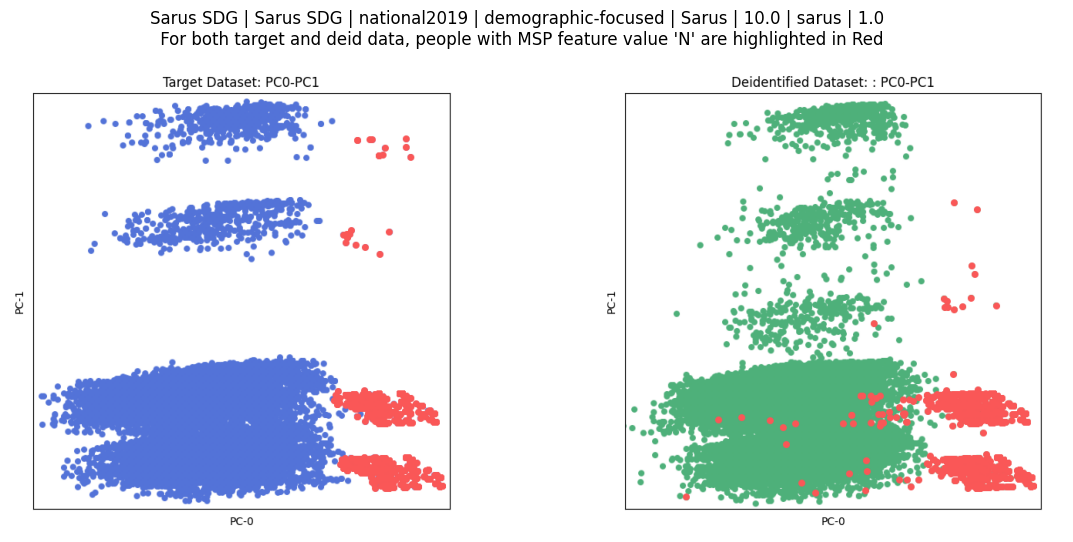

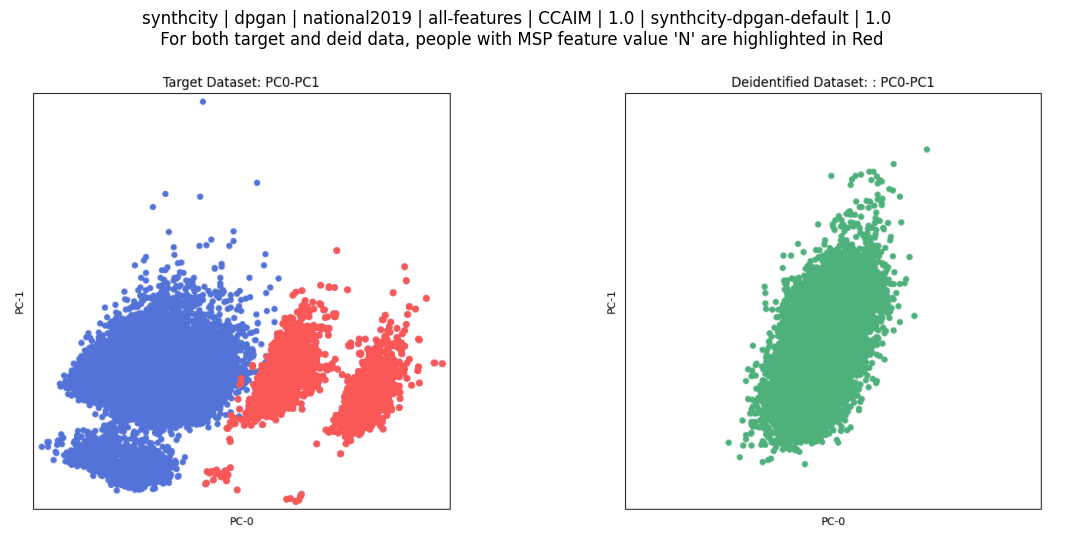

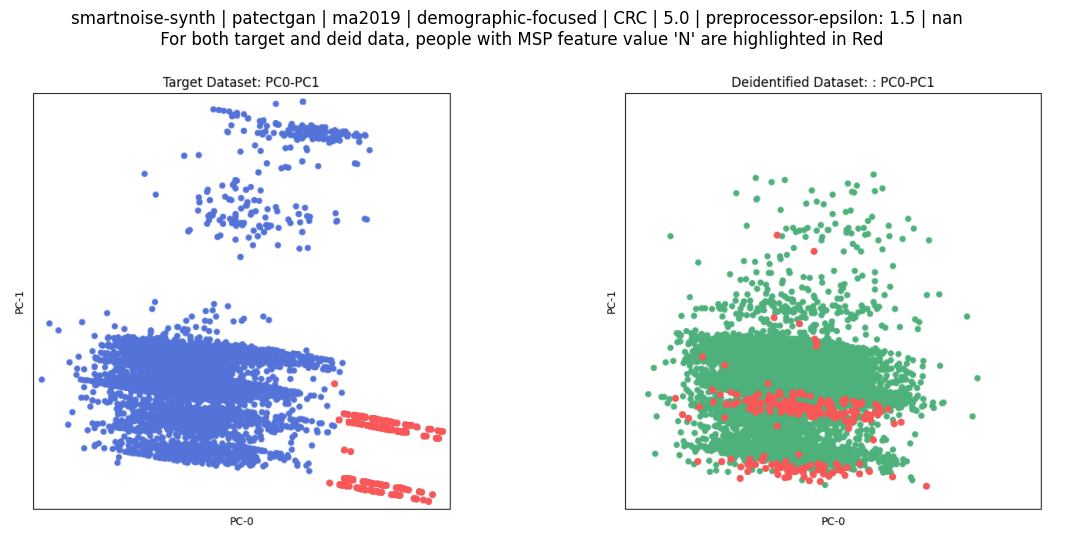

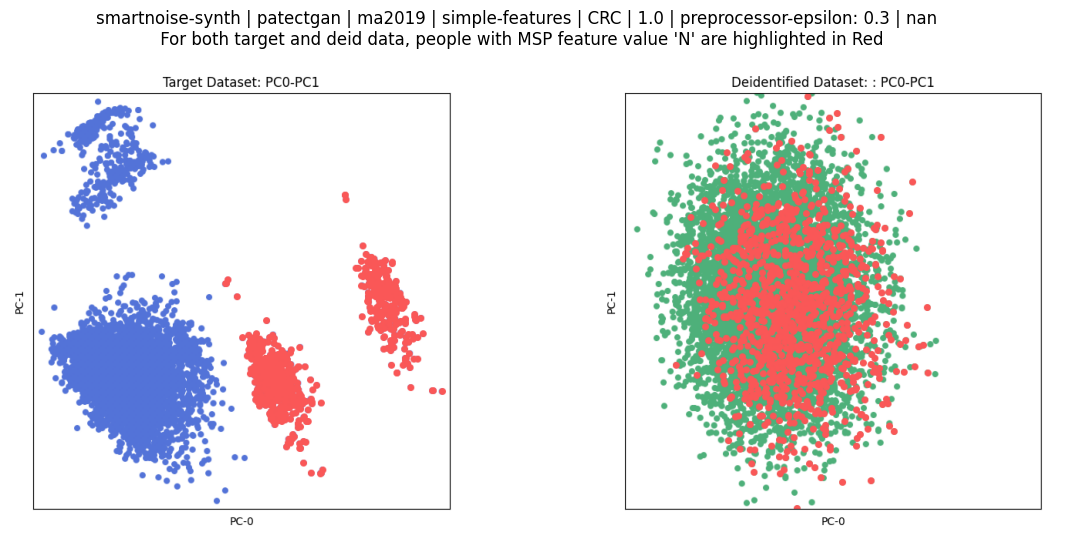

In [41]:
# Take the deid data ids of the four data samples into a list,
# so that we can iterate over it and show PCA plot for each of
# them.

# These ids were retrieved in the section 9.4 of this notebook
samples_id = [sarus_id, dpgan_id, patectgan_max_kmarg_id, patectgan_min_mspdiff_id]

# For each deid data id in the samples_id list
for s_id in samples_id:
    # Create mask to select the data sample with
    # given deid data id
    mask = idx_neural_dp_df[DEID_DATA_ID] == s_id
    # Apply mask
    idx_sample_df = idx_neural_dp_df[mask]
    # Get PCA plot path of deid data
    deid_data_path = idx_sample_df[DEID_PCA_MSP_N_PATH].values[0]
    # Get PCA plot path of target data
    target_data_path = idx_sample_df[TARGET_PCA_MSP_N_PATH].values[0]
    
    # Create a label to distinguish deid datasets created using different
    # configurations. 
    # We recommend to use following features from filtered index dataframe
    # to create a unique label for a deid dataset
    # List of properties for died dataset label:
    # * library name
    # * algorithm name
    # * target dataset
    # * feature set name
    # * team
    # * epsilon
    # * variant label
    # * submission number
    library_name = idx_sample_df[LIBRARY_NAME].values[0]
    algorithm_name = idx_sample_df[ALGORITHM_NAME].values[0]
    target_dataset = idx_sample_df[TARGET_DATASET].values[0]
    feature_set_name = idx_sample_df[FEATURE_SET_NAME].values[0]
    team = str(idx_sample_df[TEAM].values[0]) # convert to string 
    epsilon = str(idx_sample_df[EPSILON].values[0])  # convert to string
    variant_label = idx_sample_df[VARIANT_LABEL].values[0]
    submission_number = str(idx_sample_df[SUBMISSION_NUMBER].values[0])  # conver to string
    
    # Join all labels to create a single string with each label
    # separated by a vertical bar.
    label = ' | '.join([library_name, algorithm_name, target_dataset, 
                        feature_set_name, team, epsilon, variant_label,
                        submission_number])
    
    # Draw target and deid highligted PCA plot side by side
    plot.draw_pca_images(deid_data_path, target_data_path, label)

<a id="intro-section-11"></a>
## 11. Get evaluation metrics for specific samples of interest.
In the previous section we saw that some examples had MSP = 'N' records (highlighted in red in the PCA plot) in places where they didn't belong according to the target data. One of the causes of this are when deterministic relationships exist between features in the target data, but the deidentified data fails to capture them. For instance, recall that MSP = 'N' nodes represent children in the data. Children are young (AGE < 15) and don't have personal incomes (PINCP = 'N') or jobs (INDP_CAT = 'N').  If the deidentified data contains a record with AGE = 62 and MSP = 'N', or a record with MSP = 'N' and PINCP = 75000, then we say that record contains an 'inconsistency'. The metrics report tracks a variety of different inconsistency types and saves these counts in the report json.

As our final analysis, we show an example of retrieving MSP inconsistencies below.

This is an another example on how to get evaluation results from the report.json file.  

We only fetch the count of records with inconsistency in children marital status i.e. the count of records where child (AGEP < 15) is married in the deid data. We name this inconsistency as **child_MSP** and it is a part of the age based inconsistencies.

Inconsistencies were also computed as a part of SDNIST evaluation and are present in the report.json of each deid dataset.
Not all deid datasets in the filtered index dataframe (idx_neural_dp_df) will have **child_MSP** inconsistency, so we first check if such inconsistency is present in the report.json and then only get the counts, otherwise we set the count to 0.

Output of the following code cell shows the location of all the age based inconsistencies in a report.json file.

<a id="intro-section-11.1"></a>
### 11.1 List evaluation results for inconsistencies metric.
See all the available SDNIST evaluations for inconsistencies metric in a report.json file.
Output of the following code cell shows the location of all the age based inconsistencies in a report.json file.

In [42]:
# Show available evaluations for 
# inconsistencies metric in a report.json file
u.list_report(idx_df, INCONSISTENCIES)

 inconsistencies
--- age
------ title
------ description
------ inconsistencies
--- work
------ title
------ description
------ inconsistencies
--- housing
------ title
------ description
------ inconsistencies
--- summary


All the age based inconsistencies are listed under the key **inconsistencies**, which is inside the **age** key.
So to access the list of all age based inconsistencies use following code line:
`age_based_inconsistencies = report_dict[INCONSISTENCIES][AGE][INCONSISTENCIES]`

Then to get the count for only **child_MSP** inconsistency violations:  
Loop over the age_based_inconsistencies list and see if has **inconsistency_name** set as **child_MSP**. If **child_MSP** is available then get the count from key **inconsistency_violations**.
```
for incons in age_based_inconsistencies:  
    if incons[INCONSISTENCY_NAME] == CHILD_MSP:  
        count = incons[INCONSISTENCY_VIOLATIONS]   
    else:  
        count = 0  
```

<a id="intro-section-11.2"></a>
### 11.2 Get age-based inconsistency violations count.
We only read **child_MSP** type of **age-based** inconsistency violations count from a report.json.  
 
We use deid datasets from the filtered index dataframe (**idx_neural_dp_df**) which contains 
datasets generated with **nueral net** based algorithm and **differential privacy** approach.
* Create a zero filled column 'child_MSP_inconsistencies' in the filtered index data.
* For each row (deid dataset) in filtered index dataframe:
    * Get path to the SDNIST evaluation report directory.
    * Create path to the report.json file in the report directory.
    * Read the json file into a python dictionary.
    * Get the count for only child_MSP inconsistency.
    * Save the inconsistency count in the 'child_MSP_inconsistencies' column of the filtered index dataframe.
 * Show the first five recrods and the new column 'child_MSP_inconsistencies' which we added to the filtered index dataframe just now.

In [43]:
CHILD_MSP_INCONSISTENCIES = 'child_MSP_inconsistencies'

# Create a zero filled column 'child_MSP_inconsistencies' in 
# filtered index dataframe (idx_neural_dp_df).
# Use np.zeros function which takes
# shape of the zero filled array, and in this case we want that to
# be the number of records in the filtered index data (idx_neural_dp_df) 
# and can be accessed using first element of the shape property 
# in the filtered index dataframe dataframe.
idx_neural_dp_df[CHILD_MSP_INCONSISTENCIES] = np.zeros(idx_neural_dp_df.shape[0]).astype(int)


# Iterate over each row (deid dataset) in filtered index dataframe.
for i, row in idx_neural_dp_df.iterrows():
    # Get path of the SDNIST evaluation report directory
    # for the deid dataset in current row.
    report_dir_path = row[REPORT_PATH]  # report directory path
    # Create path to the report.json file in the report directory.
    report_json_path = Path(report_dir_path, 'report.json')
    # Read the json file at report_json_path into a 
    # python dictionary variable report_dict.
    with open(report_json_path) as f:
        report_dict = json.load(f)
        
    # All the age based inconsistencies are listed under 
    # the key 'inconsistencies', which is inside the 'age' key.
    # So to access the list of all age based inconsistencies can accessed as follows:
    age_based_inconsistencies = report_dict[INCONSISTENCIES][AGE][INCONSISTENCIES]
    
    # For each inconsistency type in age based in consistencies
    # check if an inconsistency has name as 'child_MSP'. If 
    # 'child_MSP' named inconsistency is found then get its count
    # which is give in 'inconsistency_violations' key of an
    # inconsistency
    for incons in age_based_inconsistencies:  
        if incons[INCONSISTENCY_NAME] == 'child_MSP':  
            child_msp_count = incons[INCONSISTENCY_VIOLATIONS]
            # Once 'child_MSP' inconsistency is found
            # then just break from the For loop since
            # the 'child_MSP' inconsistencies are listed
            # only once in the list of age based
            # inconsistencies
            break
        else:
            # else if 'child_MSP' inconsistency is not in the
            # list of age based inconsistencies that mean the
            # deid dataset has no such inconsistency in its
            # record and we can set the count as 0
            child_msp_count = 0
    
    # Save the inconsistency count in the 
    # 'child_MSP_inconsistencies' column of the 
    # filtered index dataframe.
    idx_neural_dp_df.loc[i, CHILD_MSP_INCONSISTENCIES] = child_msp_count

# Show the seven random recrods and the new column 
# 'child_MSP_inconsistencies' which we added to 
# the filtered index dataframe just now.
# Name of the columns to display in the selected data samples index
columns_to_show = [LIBRARY_NAME, ALGORITHM_NAME, ALGORITHM_TYPE, TARGET_DATASET,
                   PRIVACY_CATEGORY, EPSILON, FEATURE_SET_NAME, FEATURE_SPACE_SIZE, 
                   MSP_N_COUNT_DIFF, K_MARGINAL_SCORE, CHILD_MSP_INCONSISTENCIES]
idx_neural_dp_df[columns_to_show].sample(7)

,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,feature set name,feature space size,msp_N_count_diff,k_marginal_score,child_MSP_inconsistencies
51,synthcity,pategan,neural net,national2019,dp,1.0,all-features,5.178e+26,4247,476,4464
4,smartnoise-synth,patectgan,neural net,ma2019,dp,10.0,demographic-focused,2.270e+08,1026,832,167
18,smartnoise-synth,patectgan,neural net,national2019,dp,1.0,demographic-focused,2.270e+08,600,462,3422
46,synthcity,pategan,neural net,ma2019,dp,1.0,demographic-focused,2.270e+08,815,783,1822
66,synthcity,pategan,neural net,tx2019,dp,10.0,industry-focused,3.243e+07,1633,366,0
60,synthcity,pategan,neural net,tx2019,dp,10.0,all-features,3.604e+25,1635,712,683
43,synthcity,pategan,neural net,ma2019,dp,10.0,all-features,1.333e+25,1076,712,1843


<a id="intro-section-10.3"></a>
### 11.3 Show inconsistency violations for selected deid datasets.
We only show chid_MSP inconsistency violations count for the four deid data samples we identified in [section 9](#section-9)

In [44]:
# Take the deid data ids of the four data samples into a list,
# so that we can select only those four data samples from
# the filtered index dataframe

# These ids were retrieved in the section 9.4 of this notebook
samples_id = [sarus_id, dpgan_id, patectgan_max_kmarg_id, patectgan_min_mspdiff_id]

# Create mask to select data samples with id in samples_id list
mask = idx_neural_dp_df[DEID_DATA_ID].isin(samples_id)

# Apply mask
idx_samples_df = idx_neural_dp_df[mask]

# Show hild_MSP_inconsistencies in four identified data samples.
idx_samples_df[columns_to_show]

,library name,algorithm name,algorithm type,target dataset,privacy category,epsilon,feature set name,feature space size,msp_N_count_diff,k_marginal_score,child_MSP_inconsistencies
0,Sarus SDG,Sarus SDG,neural net,national2019,dp,10.0,demographic-focused,2.270e+08,375,947,126
42,synthcity,dpgan,neural net,national2019,dp,1.0,all-features,5.178e+26,4247,43,1851
13,smartnoise-synth,patectgan,neural net,ma2019,dp,1.0,simple-features,5.721e+18,52,350,1020
3,smartnoise-synth,patectgan,neural net,ma2019,dp,5.0,demographic-focused,2.270e+08,900,857,357
